In [64]:
#network 3d plot

In [66]:

import igraph as ig
import requests
import warnings
warnings.filterwarnings('ignore')
import json
try:
    import urllib.request as urllib2
except ImportError:
    import urllib2

data = []
req = urllib2.Request("https://raw.githubusercontent.com/plotly/datasets/master/miserables.json")
opener = urllib2.build_opener()
f = opener.open(req)

data = json.loads(f.read().decode('utf-8'))

L=len(data['links'])
Edges=[(data['links'][k]['source'], data['links'][k]['target']) for k in range(L)]

Gp=ig.Graph(Edges, directed=False)

print((Edges[0]))
labels=[]
group=[]


for node in data['nodes']:
    labels.append(node['name'])
    group.append(node['group'])


G=ig.Graph(directed=True)
def addVertex(g,name_str):
    try:
        if(name_str not in g.vs['name']):
            print('Inserted node ',name_str)
            g.add_vertex(name=name_str)
        else:
            print ('Node ',name_str,' already present')
            print(g.vs.find(name_str).index)   
    except KeyError:
        g.add_vertex(name=name_str)
    return g
   


def write_tuple_to_file(f,t):
    string=str(t[0])+' '+str(t[1])+'\n'
    f.write(string)

def retrieve_edge_name_tuple(g,t):
    a=(g.vs[t[0]]['name'],g.vs[t[1]]['name'])
    return a


def load_dataset(fileName,g):
    fileNums=[0]
    for i,eachNum in enumerate(fileNums):
        print(eachNum)
        fileName="Datasets/facebook/edges/"+str(eachNum)+".edges"
        print('fileName=',fileName)
        f=open(fileName)
        line=f.readline()
        while(line!=''):
            c=(line.split())
            g=addVertex(g,c[0])
            g=addVertex(g,c[1])
            print('Adding ',c[0],'-->',c[1])
            g.add_edge(c[0],c[1]) 
            line=f.readline()
    g.simplify()    
    return

load_dataset('abd',G)


N=len(G.vs)
layt=G.layout('kk', dim=3)

labels=[]
print(type(labels))
for eachNde in G.vs:
    labels.append(eachNde['name'])

Edges=list()
print(type(Edges))
for eachTuple in G.es:
    Edges.append(eachTuple.tuple)
    
Xn=[layt[k][0] for k in range(N)]# x-coordinates of nodes
Yn=[layt[k][1] for k in range(N)]# y-coordinates
Zn=[layt[k][2] for k in range(N)]# z-coordinates
Xe=[]
Ye=[]
Ze=[]

for e in Edges:
    Xe+=[layt[e[0]][0],layt[e[1]][0], None]# x-coordinates of edge ends
    Ye+=[layt[e[0]][1],layt[e[1]][1], None]
    Ze+=[layt[e[0]][2],layt[e[1]][2], None]

import plotly
plotly.tools.set_credentials_file(username='faceless21', api_key='Ow13URMnvyRnh6Z4wJuT')


import plotly.plotly as py
from plotly.graph_objs import *


trace1=Scatter3d(x=Xe,y=Ye,z=Ze,mode='lines',line=Line(color='rgb(125,125,125)', width=1),hoverinfo='none')

trace2=Scatter3d(x=Xn,y=Yn,z=Zn,mode='markers',name='actors',marker=Marker(symbol='circle',color=eigen,size=6,colorbar=ColorBar(title='Colorbar'),colorscale='Viridis',
                             line=Line(color='rgb(158,18,130)', width=0.5)),text=labels,hoverinfo='text')

axis=dict(showbackground=False,showline=False,zeroline=False,showgrid=False,showticklabels=False,title='')

layout = Layout(title="3D Visualization of the Facebook nodes",width=1000,height=1000,showlegend=False,scene=Scene(xaxis=XAxis(axis),
         yaxis=YAxis(axis),zaxis=ZAxis(axis),),margin=Margin(t=100),hovermode='closest',annotations=Annotations([Annotation(showarrow=False,
            xref='paper',yref='paper',x=0,y=0.1,xanchor='left',yanchor='bottom',font=Font(size=14))]),)
data=Data([trace1, trace2])
fig=Figure(data=data, layout=layout)

py.iplot(fig)



(1, 0)
0
fileName= Datasets/facebook/edges/0.edges
Inserted node  186
Adding  236 --> 186
Inserted node  122
Inserted node  285
Adding  122 --> 285
Inserted node  24
Inserted node  346
Adding  24 --> 346
Inserted node  271
Inserted node  304
Adding  271 --> 304
Inserted node  176
Inserted node  9
Adding  176 --> 9
Inserted node  130
Inserted node  329
Adding  130 --> 329
Inserted node  204
Inserted node  213
Adding  204 --> 213
Inserted node  252
Inserted node  332
Adding  252 --> 332
Inserted node  82
Inserted node  65
Adding  82 --> 65
Inserted node  276
Inserted node  26
Adding  276 --> 26
Inserted node  280
Inserted node  272
Adding  280 --> 272
Inserted node  211
Inserted node  199
Adding  211 --> 199
Inserted node  84
Node  236  already present
0
Adding  84 --> 236
Inserted node  133
Inserted node  62
Adding  133 --> 62
Inserted node  239
Inserted node  172
Adding  239 --> 172
Inserted node  322
Inserted node  53
Adding  322 --> 53
Inserted node  3
Inserted node  170
Adding  3 --

Node  108  already present
72
Adding  284 --> 108
Inserted node  140
Inserted node  137
Adding  140 --> 137
Node  56  already present
35
Node  26  already present
19
Adding  56 --> 26
Inserted node  343
Inserted node  115
Adding  343 --> 115
Node  25  already present
120
Node  323  already present
51
Adding  25 --> 323
Node  345  already present
96
Node  159  already present
127
Adding  345 --> 159
Inserted node  297
Node  26  already present
19
Adding  297 --> 26
Node  343  already present
149
Node  149  already present
128
Adding  343 --> 149
Node  320  already present
142
Node  48  already present
52
Adding  320 --> 48
Node  200  already present
54
Node  109  already present
104
Adding  200 --> 109
Inserted node  185
Node  271  already present
6
Adding  185 --> 271
Node  7  already present
139
Node  136  already present
138
Adding  7 --> 136
Node  326  already present
132
Node  149  already present
128
Adding  326 --> 149
Inserted node  104
Node  56  already present
35
Adding  104 -

Node  141  already present
94
Node  224  already present
114
Adding  141 --> 224
Node  342  already present
121
Node  119  already present
50
Adding  342 --> 119
Node  304  already present
7
Node  325  already present
61
Adding  304 --> 325
Node  136  already present
138
Inserted node  156
Adding  136 --> 156
Node  325  already present
61
Node  104  already present
153
Adding  325 --> 104
Node  211  already present
22
Node  325  already present
61
Adding  211 --> 325
Node  304  already present
7
Node  158  already present
98
Adding  304 --> 158
Node  254  already present
36
Node  302  already present
100
Adding  254 --> 302
Node  92  already present
162
Node  242  already present
80
Adding  92 --> 242
Node  30  already present
160
Inserted node  303
Adding  30 --> 303
Node  274  already present
68
Node  188  already present
43
Adding  274 --> 188
Node  28  already present
78
Node  310  already present
158
Adding  28 --> 310
Node  271  already present
6
Node  30  already present
160
Add

133
Node  57  already present
53
Adding  80 --> 57
Node  135  already present
41
Node  197  already present
73
Adding  135 --> 197
Node  203  already present
107
Node  161  already present
135
Adding  203 --> 161
Node  113  already present
184
Node  261  already present
115
Adding  113 --> 261
Node  116  already present
45
Node  23  already present
44
Adding  116 --> 23
Node  275  already present
75
Node  218  already present
206
Adding  275 --> 218
Node  285  already present
3
Node  170  already present
32
Adding  285 --> 170
Node  314  already present
208
Node  199  already present
23
Adding  314 --> 199
Node  279  already present
200
Node  111  already present
156
Adding  279 --> 111
Node  126  already present
113
Node  48  already present
52
Adding  126 --> 48
Node  36  already present
66
Node  320  already present
142
Adding  36 --> 320
Node  137  already present
148
Inserted node  167
Adding  137 --> 167
Node  140  already present
147
Node  326  already present
132
Adding  140 --

Adding  180 --> 80
Node  26  already present
19
Node  199  already present
23
Adding  26 --> 199
Node  45  already present
237
Node  104  already present
153
Adding  45 --> 104
Node  332  already present
15
Node  67  already present
59
Adding  332 --> 67
Node  303  already present
189
Node  45  already present
237
Adding  303 --> 45
Node  250  already present
257
Node  252  already present
14
Adding  250 --> 252
Node  3  already present
31
Node  26  already present
19
Adding  3 --> 26
Node  98  already present
55
Inserted node  148
Adding  98 --> 148
Node  185  already present
152
Node  55  already present
181
Adding  185 --> 55
Node  172  already present
28
Node  239  already present
27
Adding  172 --> 239
Inserted node  295
Node  239  already present
27
Adding  295 --> 239
Node  325  already present
61
Node  98  already present
55
Adding  325 --> 98
Node  252  already present
14
Node  113  already present
184
Adding  252 --> 113
Node  323  already present
51
Node  119  already presen

Adding  299 --> 24
Node  175  already present
33
Node  99  already present
222
Adding  175 --> 99
Node  325  already present
61
Node  252  already present
14
Adding  325 --> 252
Node  87  already present
233
Node  161  already present
135
Adding  87 --> 161
Node  239  already present
27
Inserted node  234
Adding  239 --> 234
Node  302  already present
100
Node  194  already present
37
Adding  302 --> 194
Node  252  already present
14
Node  29  already present
259
Adding  252 --> 29
Node  142  already present
106
Node  158  already present
98
Adding  142 --> 158
Node  88  already present
69
Node  73  already present
46
Adding  88 --> 73
Node  16  already present
176
Node  261  already present
115
Adding  16 --> 261
Node  20  already present
82
Inserted node  44
Adding  20 --> 44
Node  3  already present
31
Node  72  already present
163
Adding  3 --> 72
Node  57  already present
53
Node  249  already present
177
Adding  57 --> 249
Node  278  already present
168
Node  86  already present


106
Node  122  already present
2
Adding  142 --> 122
Node  9  already present
9
Node  258  already present
185
Adding  9 --> 258
Node  75  already present
205
Node  200  already present
54
Adding  75 --> 200
Node  148  already present
267
Node  119  already present
50
Adding  148 --> 119
Node  320  already present
142
Node  127  already present
40
Adding  320 --> 127
Node  118  already present
60
Node  211  already present
22
Adding  118 --> 211
Node  280  already present
20
Node  231  already present
38
Adding  280 --> 231
Node  14  already present
157
Node  226  already present
118
Adding  14 --> 226
Node  281  already present
198
Node  284  already present
146
Adding  281 --> 284
Node  239  already present
27
Node  325  already present
61
Adding  239 --> 325
Node  9  already present
9
Node  304  already present
7
Adding  9 --> 304
Node  173  already present
227
Node  163  already present
226
Adding  173 --> 163
Node  30  already present
160
Node  48  already present
52
Adding  30 --

Adding  248 --> 53
Node  325  already present
61
Node  186  already present
1
Adding  325 --> 186
Node  323  already present
51
Node  103  already present
42
Adding  323 --> 103
Node  170  already present
32
Node  3  already present
31
Adding  170 --> 3
Node  197  already present
73
Node  320  already present
142
Adding  197 --> 320
Node  24  already present
4
Node  194  already present
37
Adding  24 --> 194
Node  342  already present
121
Node  13  already present
129
Adding  342 --> 13
Node  141  already present
94
Node  122  already present
2
Adding  141 --> 122
Node  298  already present
277
Node  265  already present
93
Adding  298 --> 265
Node  141  already present
94
Node  72  already present
163
Adding  141 --> 72
Node  285  already present
3
Node  313  already present
56
Adding  285 --> 313
Node  22  already present
276
Node  339  already present
71
Adding  22 --> 339
Node  343  already present
149
Node  44  already present
281
Adding  343 --> 44
Node  128  already present
90
N

Node  150  already present
220
Node  163  already present
226
Adding  150 --> 163
Node  247  already present
297
Node  29  already present
259
Adding  247 --> 29
Node  25  already present
120
Node  104  already present
153
Adding  25 --> 104
Node  242  already present
80
Node  53  already present
30
Adding  242 --> 53
Node  186  already present
1
Node  203  already present
107
Adding  186 --> 203
Node  56  already present
35
Node  122  already present
2
Adding  56 --> 122
Node  246  already present
144
Node  339  already present
71
Adding  246 --> 339
Node  223  already present
67
Node  172  already present
28
Adding  223 --> 172
Node  73  already present
46
Node  48  already present
52
Adding  73 --> 48
Node  185  already present
152
Node  322  already present
29
Adding  185 --> 322
Node  50  already present
282
Node  113  already present
184
Adding  50 --> 113
Node  276  already present
18
Node  236  already present
0
Adding  276 --> 236
Inserted node  282
Inserted node  244
Adding  

290
Adding  144 --> 151
Node  64  already present
110
Node  171  already present
155
Adding  64 --> 171
Node  4  already present
293
Node  306  already present
230
Adding  4 --> 306
Node  237  already present
170
Node  51  already present
201
Adding  237 --> 51
Node  55  already present
181
Node  56  already present
35
Adding  55 --> 56
Node  185  already present
152
Node  119  already present
50
Adding  185 --> 119
Node  13  already present
129
Node  236  already present
0
Adding  13 --> 236
Node  199  already present
23
Node  128  already present
90
Adding  199 --> 128
Node  277  already present
62
Node  120  already present
296
Adding  277 --> 120
Node  297  already present
151
Node  203  already present
107
Adding  297 --> 203
Node  346  already present
5
Node  272  already present
21
Adding  346 --> 272
Node  108  already present
72
Node  320  already present
142
Adding  108 --> 320
Node  178  already present
210
Node  345  already present
96
Adding  178 --> 345
Node  213  already

Node  25  already present
120
Node  141  already present
94
Adding  25 --> 141
Node  188  already present
43
Node  26  already present
19
Adding  188 --> 26
Node  315  already present
49
Node  323  already present
51
Adding  315 --> 323
Node  25  already present
120
Node  297  already present
151
Adding  25 --> 297
Node  242  already present
80
Node  158  already present
98
Adding  242 --> 158
Node  119  already present
50
Node  188  already present
43
Adding  119 --> 188
Node  108  already present
72
Node  184  already present
126
Adding  108 --> 184
Node  26  already present
19
Node  176  already present
8
Adding  26 --> 176
Node  203  already present
107
Node  308  already present
88
Adding  203 --> 308
Node  342  already present
121
Node  21  already present
70
Adding  342 --> 21
Node  44  already present
281
Node  111  already present
156
Adding  44 --> 111
Node  142  already present
106
Node  303  already present
189
Adding  142 --> 303
Inserted node  138
Node  19  already presen

Adding  20 --> 41
Node  248  already present
112
Node  200  already present
54
Adding  248 --> 200
Node  308  already present
88
Node  338  already present
202
Adding  308 --> 338
Node  197  already present
73
Node  108  already present
72
Adding  197 --> 108
Node  96  already present
242
Node  224  already present
114
Adding  96 --> 224
Node  98  already present
55
Node  272  already present
21
Adding  98 --> 272
Node  211  already present
22
Node  222  already present
161
Adding  211 --> 222
Node  150  already present
220
Node  64  already present
110
Adding  150 --> 64
Node  224  already present
114
Node  67  already present
59
Adding  224 --> 67
Node  304  already present
7
Node  98  already present
55
Adding  304 --> 98
Node  310  already present
158
Node  137  already present
148
Adding  310 --> 137
Node  132  already present
254
Node  158  already present
98
Adding  132 --> 158
Node  105  already present
108
Node  21  already present
70
Adding  105 --> 21
Node  21  already prese

Node  73  already present
46
Node  130  already present
10
Adding  73 --> 130
Node  9  already present
9
Node  66  already present
136
Adding  9 --> 66
Node  142  already present
106
Node  109  already present
104
Adding  142 --> 109
Node  213  already present
13
Node  53  already present
30
Adding  213 --> 53
Node  271  already present
6
Node  119  already present
50
Adding  271 --> 119
Node  99  already present
222
Node  102  already present
224
Adding  99 --> 102
Node  280  already present
20
Node  105  already present
108
Adding  280 --> 105
Node  251  already present
179
Node  135  already present
41
Adding  251 --> 135
Node  312  already present
79
Node  220  already present
279
Adding  312 --> 220
Node  186  already present
1
Node  236  already present
0
Adding  186 --> 236
Node  277  already present
62
Node  98  already present
55
Adding  277 --> 98
Node  120  already present
296
Node  277  already present
62
Adding  120 --> 277
Node  26  already present
19
Node  304  already p

Node  236  already present
0
Node  257  already present
186
Adding  236 --> 257
Node  25  already present
120
Node  277  already present
62
Adding  25 --> 277
Node  339  already present
71
Node  22  already present
276
Adding  339 --> 22
Node  186  already present
1
Node  322  already present
29
Adding  186 --> 322
Node  236  already present
0
Node  13  already present
129
Adding  236 --> 13
Node  313  already present
56
Node  118  already present
60
Adding  313 --> 118
Node  285  already present
3
Node  185  already present
152
Adding  285 --> 185
Node  332  already present
15
Node  200  already present
54
Adding  332 --> 200
Node  142  already present
106
Node  134  already present
63
Adding  142 --> 134
Node  252  already present
14
Node  315  already present
49
Adding  252 --> 315
Node  296  already present
223
Node  99  already present
222
Adding  296 --> 99
Node  36  already present
66
Node  108  already present
72
Adding  36 --> 108
Node  40  already present
164
Node  329  alrea

145
Node  26  already present
19
Adding  123 --> 26
Node  211  already present
22
Node  342  already present
121
Adding  211 --> 342
Node  13  already present
129
Node  82  already present
16
Adding  13 --> 82
Node  187  already present
134
Node  346  already present
5
Adding  187 --> 346
Node  322  already present
29
Node  329  already present
11
Adding  322 --> 329
Node  113  already present
184
Node  313  already present
56
Adding  113 --> 313
Node  261  already present
115
Node  122  already present
2
Adding  261 --> 122
Node  104  already present
153
Node  203  already present
107
Adding  104 --> 203
Inserted node  198
Node  166  already present
304
Adding  198 --> 166
Node  142  already present
106
Node  56  already present
35
Adding  142 --> 56
Node  116  already present
45
Node  144  already present
117
Adding  116 --> 144
Node  295  already present
268
Node  26  already present
19
Adding  295 --> 26
Node  169  already present
74
Node  185  already present
152
Adding  169 --> 1

Node  254  already present
36
Adding  266 --> 254
Node  148  already present
267
Node  272  already present
21
Adding  148 --> 272
Node  13  already present
129
Node  342  already present
121
Adding  13 --> 342
Node  169  already present
74
Node  332  already present
15
Adding  169 --> 332
Node  4  already present
293
Node  195  already present
213
Adding  4 --> 195
Node  80  already present
133
Node  299  already present
47
Adding  80 --> 299
Node  26  already present
19
Node  98  already present
55
Adding  26 --> 98
Node  127  already present
40
Node  139  already present
103
Adding  127 --> 139
Node  223  already present
67
Node  200  already present
54
Adding  223 --> 200
Node  113  already present
184
Node  72  already present
163
Adding  113 --> 72
Node  213  already present
13
Node  40  already present
164
Adding  213 --> 40
Node  204  already present
12
Node  346  already present
5
Adding  204 --> 346
Node  113  already present
184
Node  172  already present
28
Adding  113 --> 

Adding  223 --> 315
Node  79  already present
252
Node  67  already present
59
Adding  79 --> 67
Node  203  already present
107
Node  272  already present
21
Adding  203 --> 272
Node  334  already present
91
Node  203  already present
107
Adding  334 --> 203
Node  313  already present
56
Node  252  already present
14
Adding  313 --> 252
Node  119  already present
50
Node  150  already present
220
Adding  119 --> 150
Node  229  already present
310
Node  334  already present
91
Adding  229 --> 334
Node  309  already present
172
Node  184  already present
126
Adding  309 --> 184
Node  229  already present
310
Node  109  already present
104
Adding  229 --> 109
Node  67  already present
59
Node  25  already present
120
Adding  67 --> 25
Node  187  already present
134
Node  254  already present
36
Adding  187 --> 254
Node  170  already present
32
Node  185  already present
152
Adding  170 --> 185
Node  110  already present
262
Node  8  already present
215
Adding  110 --> 8
Node  268  already

27
Adding  223 --> 239
Node  271  already present
6
Node  261  already present
115
Adding  271 --> 261
Node  342  already present
121
Node  265  already present
93
Adding  342 --> 265
Node  329  already present
11
Node  322  already present
29
Adding  329 --> 322
Node  26  already present
19
Node  200  already present
54
Adding  26 --> 200
Node  302  already present
100
Node  53  already present
30
Adding  302 --> 53
Node  203  already present
107
Node  29  already present
259
Adding  203 --> 29
Node  275  already present
75
Node  181  already present
214
Adding  275 --> 181
Node  17  already present
131
Node  111  already present
156
Adding  17 --> 111
Node  56  already present
35
Node  304  already present
7
Adding  56 --> 304
Node  82  already present
16
Node  172  already present
28
Adding  82 --> 172
Node  277  already present
62
Node  22  already present
276
Adding  277 --> 22
Node  119  already present
50
Node  269  already present
239
Adding  119 --> 269
Node  169  already pres

Node  266  already present
166
Node  204  already present
12
Adding  266 --> 204
Node  226  already present
118
Node  20  already present
82
Adding  226 --> 20
Node  203  already present
107
Node  119  already present
50
Adding  203 --> 119
Node  199  already present
23
Node  82  already present
16
Adding  199 --> 82
Node  225  already present
264
Node  177  already present
231
Adding  225 --> 177
Node  211  already present
22
Node  238  already present
92
Adding  211 --> 238
Node  67  already present
59
Node  10  already present
180
Adding  67 --> 10
Node  122  already present
2
Node  236  already present
0
Adding  122 --> 236
Node  252  already present
14
Node  72  already present
163
Adding  252 --> 72
Node  227  already present
241
Node  225  already present
264
Adding  227 --> 225
Node  252  already present
14
Node  31  already present
137
Adding  252 --> 31
Node  146  already present
122
Node  148  already present
267
Adding  146 --> 148
Node  224  already present
114
Node  25  a

Node  50  already present
282
Adding  334 --> 50
Node  109  already present
104
Node  271  already present
6
Adding  109 --> 271
Node  252  already present
14
Node  223  already present
67
Adding  252 --> 223
Node  315  already present
49
Node  170  already present
32
Adding  315 --> 170
Node  185  already present
152
Node  56  already present
35
Adding  185 --> 56
Node  26  already present
19
Node  62  already present
26
Adding  26 --> 62
Node  211  already present
22
Node  223  already present
67
Adding  211 --> 223
Node  122  already present
2
Node  271  already present
6
Adding  122 --> 271
Node  14  already present
157
Node  312  already present
79
Adding  14 --> 312
Node  9  already present
9
Node  56  already present
35
Adding  9 --> 56
Node  224  already present
114
Node  133  already present
25
Adding  224 --> 133
Node  268  already present
207
Node  59  already present
130
Adding  268 --> 59
Node  223  already present
67
Node  261  already present
115
Adding  223 --> 261
Node

Node  104  already present
153
Adding  200 --> 104
Node  325  already present
61
Node  342  already present
121
Adding  325 --> 342
Node  104  already present
153
Node  128  already present
90
Adding  104 --> 128
Node  119  already present
50
Node  277  already present
62
Adding  119 --> 277
Node  213  already present
13
Node  277  already present
62
Adding  213 --> 277
Node  314  already present
208
Node  161  already present
135
Adding  314 --> 161
Node  214  already present
81
Node  333  already present
85
Adding  214 --> 333
Node  232  already present
109
Node  280  already present
20
Adding  232 --> 280
Node  121  already present
229
Node  169  already present
74
Adding  121 --> 169
Node  342  already present
121
Node  271  already present
6
Adding  342 --> 271
Node  331  already present
219
Node  186  already present
1
Adding  331 --> 186
Node  252  already present
14
Node  104  already present
153
Adding  252 --> 104
Node  122  already present
2
Node  169  already present
74
Add

Node  324  already present
154
Adding  67 --> 324
Node  75  already present
205
Node  274  already present
68
Adding  75 --> 274
Node  40  already present
164
Node  21  already present
70
Adding  40 --> 21
Node  323  already present
51
Node  290  already present
119
Adding  323 --> 290
Node  126  already present
113
Node  73  already present
46
Adding  126 --> 73
Node  200  already present
54
Node  239  already present
27
Adding  200 --> 239
Node  123  already present
145
Node  142  already present
106
Adding  123 --> 142
Node  26  already present
19
Node  239  already present
27
Adding  26 --> 239
Node  322  already present
29
Node  142  already present
106
Adding  322 --> 142
Node  312  already present
79
Node  20  already present
82
Adding  312 --> 20
Node  213  already present
13
Node  30  already present
160
Adding  213 --> 30
Node  162  already present
203
Node  312  already present
79
Adding  162 --> 312
Node  170  already present
32
Node  21  already present
70
Adding  170 --> 

Adding  14 --> 149
Node  199  already present
23
Node  324  already present
154
Adding  199 --> 324
Node  252  already present
14
Node  169  already present
74
Adding  252 --> 169
Node  135  already present
41
Node  251  already present
179
Adding  135 --> 251
Node  204  already present
12
Node  330  already present
173
Adding  204 --> 330
Node  40  already present
164
Node  307  already present
83
Adding  40 --> 307
Node  329  already present
11
Node  202  already present
305
Adding  329 --> 202
Node  66  already present
136
Node  142  already present
106
Adding  66 --> 142
Node  113  already present
184
Node  291  already present
105
Adding  113 --> 291
Node  191  already present
307
Node  130  already present
10
Adding  191 --> 130
Node  256  already present
303
Node  233  already present
302
Adding  256 --> 233
Node  322  already present
29
Node  126  already present
113
Adding  322 --> 126
Node  186  already present
1
Node  325  already present
61
Adding  186 --> 325
Node  128  al

Adding  291 --> 315
Node  117  already present
39
Node  38  already present
99
Adding  117 --> 38
Node  314  already present
208
Node  271  already present
6
Adding  314 --> 271
Node  92  already present
162
Node  299  already present
47
Adding  92 --> 299
Node  98  already present
55
Node  67  already present
59
Adding  98 --> 67
Node  122  already present
2
Node  5  already present
209
Adding  122 --> 5
Node  122  already present
2
Node  176  already present
8
Adding  122 --> 176
Node  116  already present
45
Node  41  already present
247
Adding  116 --> 41
Node  291  already present
105
Node  248  already present
112
Adding  291 --> 248
Node  291  already present
105
Node  141  already present
94
Adding  291 --> 141
Node  214  already present
81
Node  289  already present
270
Adding  214 --> 289
Node  281  already present
198
Node  36  already present
66
Adding  281 --> 36
Node  21  already present
70
Node  123  already present
145
Adding  21 --> 123
Node  261  already present
115
N

Adding  82 --> 29
Node  98  already present
55
Node  62  already present
26
Adding  98 --> 62
Node  56  already present
35
Node  109  already present
104
Adding  56 --> 109
Node  122  already present
2
Node  297  already present
151
Adding  122 --> 297
Node  339  already present
71
Node  260  already present
271
Adding  339 --> 260
Node  78  already present
95
Node  181  already present
214
Adding  78 --> 181
Node  141  already present
94
Node  56  already present
35
Adding  141 --> 56
Node  72  already present
163
Node  199  already present
23
Adding  72 --> 199
Node  291  already present
105
Node  98  already present
55
Adding  291 --> 98
Node  31  already present
137
Node  142  already present
106
Adding  31 --> 142
Node  82  already present
16
Node  119  already present
50
Adding  82 --> 119
Node  322  already present
29
Node  304  already present
7
Adding  322 --> 304
Node  252  already present
14
Node  324  already present
154
Adding  252 --> 324
Node  186  already present
1
Node

Node  104  already present
153
Node  98  already present
55
Adding  104 --> 98
Node  243  already present
212
Node  310  already present
158
Adding  243 --> 310
Node  67  already present
59
Node  315  already present
49
Adding  67 --> 315
Node  134  already present
63
Node  142  already present
106
Adding  134 --> 142
Node  50  already present
282
Node  109  already present
104
Adding  50 --> 109
Node  31  already present
137
Node  7  already present
139
Adding  31 --> 7
Node  239  already present
27
Node  272  already present
21
Adding  239 --> 272
Node  26  already present
19
Node  280  already present
20
Adding  26 --> 280
Node  75  already present
205
Node  85  already present
143
Adding  75 --> 85
Node  236  already present
0
Node  67  already present
59
Adding  236 --> 67
Node  188  already present
43
Node  271  already present
6
Adding  188 --> 271
Node  56  already present
35
Node  331  already present
219
Adding  56 --> 331
Node  277  already present
62
Node  239  already pres

Adding  213 --> 136
Node  223  already present
67
Node  21  already present
70
Adding  223 --> 21
Node  280  already present
20
Node  322  already present
29
Adding  280 --> 322
Node  175  already present
33
Node  102  already present
224
Adding  175 --> 102
Node  291  already present
105
Node  113  already present
184
Adding  291 --> 113
Node  220  already present
279
Node  312  already present
79
Adding  220 --> 312
Node  223  already present
67
Node  252  already present
14
Adding  223 --> 252
Node  203  already present
107
Node  322  already present
29
Adding  203 --> 322
Node  328  already present
218
Node  181  already present
214
Adding  328 --> 181
Node  277  already present
62
Node  113  already present
184
Adding  277 --> 113
Node  277  already present
62
Node  9  already present
9
Adding  277 --> 9
Node  5  already present
209
Node  158  already present
98
Adding  5 --> 158
Node  312  already present
79
Node  19  already present
204
Adding  312 --> 19
Node  98  already prese

Node  113  already present
184
Node  122  already present
2
Adding  113 --> 122
Node  23  already present
44
Node  155  already present
306
Adding  23 --> 155
Node  9  already present
9
Node  297  already present
151
Adding  9 --> 297
Node  206  already present
309
Node  260  already present
271
Adding  206 --> 260
Node  109  already present
104
Node  277  already present
62
Adding  109 --> 277
Node  280  already present
20
Node  153  already present
317
Adding  280 --> 153
Node  275  already present
75
Node  152  already present
266
Adding  275 --> 152
Node  296  already present
223
Node  68  already present
274
Adding  296 --> 68
Node  101  already present
221
Node  180  already present
232
Adding  101 --> 180
Node  291  already present
105
Node  277  already present
62
Adding  291 --> 277
Node  272  already present
21
Node  188  already present
43
Adding  272 --> 188
Node  227  already present
241
Node  19  already present
204
Adding  227 --> 19
Node  259  already present
236
Node  

Node  196  already present
187
Node  285  already present
3
Adding  196 --> 285
Node  272  already present
21
Node  291  already present
105
Adding  272 --> 291
Node  217  already present
111
Node  150  already present
220
Adding  217 --> 150
Node  92  already present
162
Node  302  already present
100
Adding  92 --> 302
Node  334  already present
91
Node  128  already present
90
Adding  334 --> 128
Node  31  already present
137
Node  25  already present
120
Adding  31 --> 25
Node  161  already present
135
Node  203  already present
107
Adding  161 --> 203
Node  105  already present
108
Node  25  already present
120
Adding  105 --> 25
Node  236  already present
0
Node  133  already present
25
Adding  236 --> 133
Node  86  already present
265
Node  175  already present
33
Adding  86 --> 175
Node  67  already present
59
Node  161  already present
135
Adding  67 --> 161
Node  16  already present
176
Node  331  already present
219
Adding  16 --> 331
Node  277  already present
62
Node  168 

Node  334  already present
91
Node  318  already present
225
Adding  334 --> 318
Node  132  already present
254
Node  317  already present
97
Adding  132 --> 317
Node  123  already present
145
Node  261  already present
115
Adding  123 --> 261
Node  40  already present
164
Node  132  already present
254
Adding  40 --> 132
Node  212  already present
167
Node  271  already present
6
Adding  212 --> 271
Node  223  already present
67
Node  325  already present
61
Adding  223 --> 325
Node  25  already present
120
Node  73  already present
46
Adding  25 --> 73
Node  40  already present
164
Node  172  already present
28
Adding  40 --> 172
Node  24  already present
4
Node  80  already present
133
Adding  24 --> 80
Node  322  already present
29
Node  169  already present
74
Adding  322 --> 169
Node  91  already present
243
Node  201  already present
269
Adding  91 --> 201
Node  304  already present
7
Node  136  already present
138
Adding  304 --> 136
Node  62  already present
26
Node  56  alrea

Node  145  already present
291
Node  179  already present
288
Adding  145 --> 179
Node  227  already present
241
Node  175  already present
33
Adding  227 --> 175
Node  188  already present
43
Node  185  already present
152
Adding  188 --> 185
Node  21  already present
70
Node  345  already present
96
Adding  21 --> 345
Node  239  already present
27
Node  303  already present
189
Adding  239 --> 303
Node  77  already present
314
Node  231  already present
38
Adding  77 --> 231
Node  315  already present
49
Node  40  already present
164
Adding  315 --> 40
Node  133  already present
25
Node  1  already present
125
Adding  133 --> 1
Node  69  already present
183
Node  39  already present
178
Adding  69 --> 39
Node  237  already present
170
Node  83  already present
77
Adding  237 --> 83
Node  56  already present
35
Node  98  already present
55
Adding  56 --> 98
Node  65  already present
17
Node  13  already present
129
Adding  65 --> 13
Node  323  already present
51
Node  186  already pre

Node  149  already present
128
Node  116  already present
45
Adding  149 --> 116
Node  170  already present
32
Node  341  already present
89
Adding  170 --> 341
Node  175  already present
33
Node  227  already present
241
Adding  175 --> 227
Node  169  already present
74
Node  103  already present
42
Adding  169 --> 103
Node  121  already present
229
Node  39  already present
178
Adding  121 --> 39
Node  140  already present
147
Node  115  already present
150
Adding  140 --> 115
Node  295  already present
268
Node  258  already present
185
Adding  295 --> 258
Node  325  already present
61
Node  311  already present
171
Adding  325 --> 311
Node  144  already present
117
Node  312  already present
79
Adding  144 --> 312
Node  66  already present
136
Node  113  already present
184
Adding  66 --> 113
Node  277  already present
62
Node  21  already present
70
Adding  277 --> 21
Node  332  already present
15
Node  21  already present
70
Adding  332 --> 21
Node  142  already present
106
Node 

Node  200  already present
54
Node  332  already present
15
Adding  200 --> 332
Node  261  already present
115
Node  55  already present
181
Adding  261 --> 55
Node  247  already present
297
Node  120  already present
296
Adding  247 --> 120
Node  203  already present
107
Node  271  already present
6
Adding  203 --> 271
Node  302  already present
100
Node  92  already present
162
Adding  302 --> 92
Node  266  already present
166
Node  346  already present
5
Adding  266 --> 346
Node  25  already present
120
Node  83  already present
77
Adding  25 --> 83
Node  200  already present
54
Node  40  already present
164
Adding  200 --> 40
Node  329  already present
11
Node  40  already present
164
Adding  329 --> 40
Node  197  already present
73
Node  135  already present
41
Adding  197 --> 135
Node  253  already present
324
Node  230  already present
174
Adding  253 --> 230
Node  150  already present
220
Node  217  already present
111
Adding  150 --> 217
Node  150  already present
220
Node  11

Adding  40 --> 25
Node  39  already present
178
Node  119  already present
50
Adding  39 --> 119
Node  14  already present
157
Node  310  already present
158
Adding  14 --> 310
Node  176  already present
8
Node  148  already present
267
Adding  176 --> 148
Node  273  already present
76
Node  4  already present
293
Adding  273 --> 4
Node  203  already present
107
Node  40  already present
164
Adding  203 --> 40
Node  148  already present
267
Node  261  already present
115
Adding  148 --> 261
Node  48  already present
52
Node  30  already present
160
Adding  48 --> 30
Node  41  already present
247
Node  93  already present
246
Adding  41 --> 93
Node  252  already present
14
Node  188  already present
43
Adding  252 --> 188
Node  142  already present
106
Node  45  already present
237
Adding  142 --> 45
Node  281  already present
198
Node  309  already present
172
Adding  281 --> 309
Node  115  already present
150
Node  149  already present
128
Adding  115 --> 149
Node  56  already present

Adding  200 --> 252
Node  56  already present
35
Node  271  already present
6
Adding  56 --> 271
Node  310  already present
158
Node  14  already present
157
Adding  310 --> 14
Node  242  already present
80
Node  92  already present
162
Adding  242 --> 92
Node  80  already present
133
Node  88  already present
69
Adding  80 --> 88
Node  53  already present
30
Node  1  already present
125
Adding  53 --> 1
Node  40  already present
164
Node  298  already present
277
Adding  40 --> 298
Node  235  already present
248
Node  156  already present
188
Adding  235 --> 156
Node  16  already present
176
Node  332  already present
15
Adding  16 --> 332
Node  63  already present
57
Node  342  already present
121
Adding  63 --> 342
Node  186  already present
1
Node  88  already present
69
Adding  186 --> 88
Node  173  already present
227
Node  202  already present
305
Adding  173 --> 202
Node  165  already present
228
Node  188  already present
43
Adding  165 --> 188
Node  165  already present
228
N

Adding  320 --> 197
Node  26  already present
19
Node  142  already present
106
Adding  26 --> 142
Node  241  already present
322
Node  49  already present
141
Adding  241 --> 49
Node  170  already present
32
Node  119  already present
50
Adding  170 --> 119
Node  87  already present
233
Node  291  already present
105
Adding  87 --> 291
Node  199  already present
23
Node  200  already present
54
Adding  199 --> 200
Node  320  already present
142
Node  80  already present
133
Adding  320 --> 80
Node  143  already present
244
Node  321  already present
273
Adding  143 --> 321
Node  217  already present
111
Node  189  already present
234
Adding  217 --> 189
Node  303  already present
189
Node  67  already present
59
Adding  303 --> 67
Node  9  already present
9
Node  188  already present
43
Adding  9 --> 188
Node  122  already present
2
Node  239  already present
27
Adding  122 --> 239
Node  302  already present
100
Node  299  already present
47
Adding  302 --> 299
Node  118  already pres

Adding  85 --> 75
Node  98  already present
55
Node  332  already present
15
Adding  98 --> 332
Node  291  already present
105
Node  339  already present
71
Adding  291 --> 339
<class 'list'>
<class 'list'>


In [ ]:
#centrality

In [67]:
from igraph import * 
g=Graph()

def addVertex(g,name_str):
    try:
        if(name_str not in g.vs['name']):
            print('Inserted node ',name_str)
            g.add_vertex(name=name_str)
        else:
            print ('Node ',name_str,' already present')
            print(g.vs.find(name_str).index)   
    except KeyError:
        g.add_vertex(name=name_str)
    return g
   


def write_tuple_to_file(f,t):
    string=str(t[0])+' '+str(t[1])+'\n'
    f.write(string)

def retrieve_edge_name_tuple(g,t):
    a=(g.vs[t[0]]['name'],g.vs[t[1]]['name'])
    return a

def load_dataset(fileName,g):
    fileNums=[0]
    for i,eachNum in enumerate(fileNums):
        print(eachNum)
        fileName="Datasets/facebook/edges/"+str(eachNum)+".edges"
        print('fileName=',fileName)
        f=open(fileName)
        line=f.readline()
        while(line!=''):
            c=(line.split())
            g=addVertex(g,c[0])
            g=addVertex(g,c[1])
            print('Adding ',c[0],'-->',c[1])
            g.add_edge(c[0],c[1]) 
            line=f.readline()
    g.simplify()    
    return


load_dataset('abd',g)
print(len(g.vs))

print(len(g.vs))


def calculate_eigen(g):
    eigen=g.evcent(directed=False)
    for i in range(1,6):
        maxVal=max(eigen)
        print(i,'==node',g.vs[eigen.index(maxVal)]['name'],' with score of ',maxVal)
        eigen.remove(maxVal)
    eigen=g.evcent(directed=False)
    return eigen

def calculate_closeness(g):
    close=g.closeness(g.vs)
    for i in range(1,6):
        maxVal=max(close)
        print(i,'==node',g.vs[close.index(maxVal)]['name'],' with score of ',maxVal)
        close.remove(maxVal)
    close=g.closeness(g.vs)
    return close

def calculate_between(g):
    between=g.betweenness(g.vs)
    for i in range(1,6):
        maxVal=max(between)
        print(i,'==node',g.vs[between.index(maxVal)]['name'],' with score of ',maxVal)
        between.remove(maxVal)
    between=g.betweenness(g.vs)
    return between

print('Eigen Vector')
global eigen
eigen=calculate_eigen(g)

global close
global between
print('Closeness')
close=calculate_closeness(g)
print('Betweenness')
between=calculate_between(g)

from igraph import * 
G=Graph()

load_dataset('abd',G)


N=len(G.vs)
layt=G.layout('kk', dim=3)

labels=[]
print(type(labels))
for eachNde in G.vs:
    labels.append(eachNde['name'])

Edges=list()
print(type(Edges))
for eachTuple in G.es:
    Edges.append(eachTuple.tuple)
    
Xn=[layt[k][0] for k in range(N)]# x-coordinates of nodes
Yn=[layt[k][1] for k in range(N)]# y-coordinates
Zn=[layt[k][2] for k in range(N)]# z-coordinates
Xe=[]
Ye=[]
Ze=[]

for e in Edges:
    Xe+=[layt[e[0]][0],layt[e[1]][0], None]# x-coordinates of edge ends
    Ye+=[layt[e[0]][1],layt[e[1]][1], None]
    Ze+=[layt[e[0]][2],layt[e[1]][2], None]

import plotly
plotly.tools.set_credentials_file(username='faceless21', api_key='Ow13URMnvyRnh6Z4wJuT')

import plotly.plotly as py
from plotly.graph_objs import *


trace1=Scatter3d(x=Xe,y=Ye,z=Ze,mode='lines',line=Line(color='rgb(125,125,125)', width=1),hoverinfo='none')

trace2=Scatter3d(x=Xn,y=Yn,z=Zn,mode='markers',name='actors',marker=Marker(symbol='circle',color=eigen,size=6,colorbar=ColorBar(
                title='Colorbar'),colorscale='Viridis',line=Line(color='rgb(158,18,130)', width=0.5)),text=labels,hoverinfo='text')

axis=dict(showbackground=False,showline=False,zeroline=False,showgrid=False,showticklabels=False,title='')

layout = Layout(title="3D Visualization of the Facebook nodes",width=1000,height=1000,showlegend=False,scene=Scene(xaxis=XAxis(axis),
         yaxis=YAxis(axis),zaxis=ZAxis(axis),),margin=Margin(t=100),hovermode='closest',annotations=Annotations([Annotation(showarrow=False,
        xref='paper',yref='paper',x=0,y=0.1,xanchor='left',yanchor='bottom',font=Font(size=14))]),)

data=Data([trace1, trace2])
fig=Figure(data=data, layout=layout)

py.iplot(fig)


0
fileName= Datasets/facebook/edges/0.edges
Inserted node  186
Adding  236 --> 186
Inserted node  122
Inserted node  285
Adding  122 --> 285
Inserted node  24
Inserted node  346
Adding  24 --> 346
Inserted node  271
Inserted node  304
Adding  271 --> 304
Inserted node  176
Inserted node  9
Adding  176 --> 9
Inserted node  130
Inserted node  329
Adding  130 --> 329
Inserted node  204
Inserted node  213
Adding  204 --> 213
Inserted node  252
Inserted node  332
Adding  252 --> 332
Inserted node  82
Inserted node  65
Adding  82 --> 65
Inserted node  276
Inserted node  26
Adding  276 --> 26
Inserted node  280
Inserted node  272
Adding  280 --> 272
Inserted node  211
Inserted node  199
Adding  211 --> 199
Inserted node  84
Node  236  already present
0
Adding  84 --> 236
Inserted node  133
Inserted node  62
Adding  133 --> 62
Inserted node  239
Inserted node  172
Adding  239 --> 172
Inserted node  322
Inserted node  53
Adding  322 --> 53
Inserted node  3
Inserted node  170
Adding  3 --> 170
I

11
Adding  324 --> 329
Node  9  already present
9
Node  252  already present
14
Adding  9 --> 252
Node  1  already present
125
Node  315  already present
49
Adding  1 --> 315
Node  21  already present
70
Node  274  already present
68
Adding  21 --> 274
Node  119  already present
50
Inserted node  171
Adding  119 --> 171
Node  345  already present
96
Node  67  already present
59
Adding  345 --> 67
Node  280  already present
20
Node  1  already present
125
Adding  280 --> 1
Node  313  already present
56
Node  265  already present
93
Adding  313 --> 265
Node  277  already present
62
Node  271  already present
6
Adding  277 --> 271
Node  56  already present
35
Node  88  already present
69
Adding  56 --> 88
Node  9  already present
9
Node  203  already present
107
Adding  9 --> 203
Node  85  already present
143
Node  176  already present
8
Adding  85 --> 176
Inserted node  111
Node  343  already present
149
Adding  111 --> 343
Inserted node  14
Node  20  already present
82
Adding  14 --> 20

Adding  291 --> 280
Node  119  already present
50
Node  54  already present
102
Adding  119 --> 54
Node  271  already present
6
Node  232  already present
109
Adding  271 --> 232
Node  135  already present
41
Inserted node  281
Adding  135 --> 281
Node  258  already present
185
Node  9  already present
9
Adding  258 --> 9
Node  285  already present
3
Node  200  already present
54
Adding  285 --> 200
Node  330  already present
173
Node  94  already present
124
Adding  330 --> 94
Inserted node  263
Node  175  already present
33
Adding  263 --> 175
Node  212  already present
167
Node  304  already present
7
Adding  212 --> 304
Node  238  already present
92
Node  342  already present
121
Adding  238 --> 342
Node  284  already present
146
Node  159  already present
127
Adding  284 --> 159
Node  111  already present
156
Inserted node  279
Adding  111 --> 279
Node  141  already present
94
Node  172  already present
28
Adding  141 --> 172
Node  66  already present
136
Node  21  already present

Node  291  already present
105
Node  25  already present
120
Adding  291 --> 25
Node  13  already present
129
Node  188  already present
43
Adding  13 --> 188
Node  104  already present
153
Inserted node  318
Adding  104 --> 318
Node  261  already present
115
Node  65  already present
17
Adding  261 --> 65
Node  265  already present
93
Node  128  already present
90
Adding  265 --> 128
Inserted node  163
Inserted node  173
Adding  163 --> 173
Node  116  already present
45
Node  14  already present
157
Adding  116 --> 14
Node  92  already present
162
Node  1  already present
125
Adding  92 --> 1
Node  26  already present
19
Node  3  already present
31
Adding  26 --> 3
Inserted node  165
Inserted node  121
Adding  165 --> 121
Node  3  already present
31
Node  25  already present
120
Adding  3 --> 25
Node  149  already present
128
Node  226  already present
118
Adding  149 --> 226
Node  328  already present
218
Inserted node  306
Adding  328 --> 306
Node  172  already present
28
Node  141 

Adding  59 --> 271
Node  40  already present
164
Node  213  already present
13
Adding  40 --> 213
Node  158  already present
98
Node  26  already present
19
Adding  158 --> 26
Node  211  already present
22
Node  82  already present
16
Adding  211 --> 82
Node  285  already present
3
Inserted node  208
Adding  285 --> 208
Node  119  already present
50
Node  285  already present
3
Adding  119 --> 285
Node  26  already present
19
Node  9  already present
9
Adding  26 --> 9
Node  40  already present
164
Node  133  already present
25
Adding  40 --> 133
Node  143  already present
244
Node  175  already present
33
Adding  143 --> 175
Node  56  already present
35
Inserted node  132
Adding  56 --> 132
Node  45  already present
237
Inserted node  221
Adding  45 --> 221
Node  212  already present
167
Node  344  already present
58
Adding  212 --> 344
Node  285  already present
3
Node  315  already present
49
Adding  285 --> 315
Inserted node  301
Node  324  already present
154
Adding  301 --> 324
N

32
Node  250  already present
257
Adding  170 --> 250
Node  176  already present
8
Node  290  already present
119
Adding  176 --> 290
Node  225  already present
264
Node  227  already present
241
Adding  225 --> 227
Node  324  already present
154
Node  118  already present
60
Adding  324 --> 118
Node  98  already present
55
Node  104  already present
153
Adding  98 --> 104
Node  318  already present
225
Node  119  already present
50
Adding  318 --> 119
Node  291  already present
105
Node  72  already present
163
Adding  291 --> 72
Node  38  already present
99
Node  141  already present
94
Adding  38 --> 141
Node  156  already present
188
Node  295  already present
268
Adding  156 --> 295
Node  31  already present
137
Node  51  already present
201
Adding  31 --> 51
Node  123  already present
145
Node  334  already present
91
Adding  123 --> 334
Node  251  already present
179
Node  284  already present
146
Adding  251 --> 284
Node  19  already present
204
Node  312  already present
79
Ad

Inserted node  124
Node  170  already present
32
Adding  124 --> 170
Node  174  already present
192
Inserted node  112
Adding  174 --> 112
Node  85  already present
143
Node  323  already present
51
Adding  85 --> 323
Node  325  already present
61
Node  222  already present
161
Adding  325 --> 222
Node  290  already present
119
Node  56  already present
35
Adding  290 --> 56
Node  3  already present
31
Node  142  already present
106
Adding  3 --> 142
Node  300  already present
123
Node  130  already present
10
Adding  300 --> 130
Node  109  already present
104
Node  324  already present
154
Adding  109 --> 324
Node  251  already present
179
Node  108  already present
72
Adding  251 --> 108
Node  218  already present
206
Node  328  already present
218
Adding  218 --> 328
Node  9  already present
9
Node  176  already present
8
Adding  9 --> 176
Node  128  already present
90
Node  322  already present
29
Adding  128 --> 322
Node  26  already present
19
Node  203  already present
107
Addin

Adding  309 --> 320
Node  36  already present
66
Node  197  already present
73
Adding  36 --> 197
Node  87  already present
233
Node  315  already present
49
Adding  87 --> 315
Node  322  already present
29
Node  161  already present
135
Adding  322 --> 161
Node  28  already present
78
Inserted node  151
Adding  28 --> 151
Node  177  already present
231
Node  131  already present
275
Adding  177 --> 131
Node  239  already present
27
Node  203  already present
107
Adding  239 --> 203
Node  187  already present
134
Node  92  already present
162
Adding  187 --> 92
Node  299  already present
47
Node  94  already present
124
Adding  299 --> 94
Node  280  already present
20
Node  304  already present
7
Adding  280 --> 304
Node  31  already present
137
Node  339  already present
71
Adding  31 --> 339
Node  56  already present
35
Node  221  already present
255
Adding  56 --> 221
Node  179  already present
288
Inserted node  145
Adding  179 --> 145
Node  48  already present
52
Node  54  already

Node  21  already present
70
Node  332  already present
15
Adding  21 --> 332
Node  325  already present
61
Node  265  already present
93
Adding  325 --> 265
Node  342  already present
121
Node  98  already present
55
Adding  342 --> 98
Node  148  already present
267
Node  50  already present
282
Adding  148 --> 50
Node  170  already present
32
Node  128  already present
90
Adding  170 --> 128
Node  141  already present
94
Node  291  already present
105
Adding  141 --> 291
Node  200  already present
54
Node  67  already present
59
Adding  200 --> 67
Node  161  already present
135
Node  339  already present
71
Adding  161 --> 339
Node  9  already present
9
Node  105  already present
108
Adding  9 --> 105
Node  324  already present
154
Node  22  already present
276
Adding  324 --> 22
Node  108  already present
72
Node  36  already present
66
Adding  108 --> 36
Node  119  already present
50
Node  271  already present
6
Adding  119 --> 271
Node  280  already present
20
Node  252  already p

Adding  5 --> 180
Node  297  already present
151
Node  322  already present
29
Adding  297 --> 322
Node  199  already present
23
Node  56  already present
35
Adding  199 --> 56
Node  196  already present
187
Node  266  already present
166
Adding  196 --> 266
Node  195  already present
213
Node  4  already present
293
Adding  195 --> 4
Node  238  already present
92
Node  203  already present
107
Adding  238 --> 203
Node  142  already present
106
Node  161  already present
135
Adding  142 --> 161
Node  347  already present
196
Node  168  already present
87
Adding  347 --> 168
Node  67  already present
59
Node  62  already present
26
Adding  67 --> 62
Node  315  already present
49
Node  203  already present
107
Adding  315 --> 203
Node  170  already present
32
Node  268  already present
207
Adding  170 --> 268
Node  128  already present
90
Node  271  already present
6
Adding  128 --> 271
Node  111  already present
156
Node  310  already present
158
Adding  111 --> 310
Node  62  already pr

Node  285  already present
3
Adding  221 --> 285
Node  56  already present
35
Node  334  already present
91
Adding  56 --> 334
Node  200  already present
54
Node  55  already present
181
Adding  200 --> 55
Node  56  already present
35
Node  136  already present
138
Adding  56 --> 136
Node  326  already present
132
Node  162  already present
203
Adding  326 --> 162
Node  181  already present
214
Node  275  already present
75
Adding  181 --> 275
Node  56  already present
35
Node  298  already present
277
Adding  56 --> 298
Inserted node  147
Node  95  already present
295
Adding  147 --> 95
Node  185  already present
152
Node  22  already present
276
Adding  185 --> 22
Node  212  already present
167
Node  172  already present
28
Adding  212 --> 172
Node  67  already present
59
Node  9  already present
9
Adding  67 --> 9
Node  13  already present
129
Node  148  already present
267
Adding  13 --> 148
Node  54  already present
102
Node  1  already present
125
Adding  54 --> 1
Node  40  alrea

Node  285  already present
3
Inserted node  164
Adding  285 --> 164
Node  265  already present
93
Node  331  already present
219
Adding  265 --> 331
Node  323  already present
51
Node  341  already present
89
Adding  323 --> 341
Node  299  already present
47
Node  180  already present
232
Adding  299 --> 180
Node  242  already present
80
Node  80  already present
133
Adding  242 --> 80
Node  285  already present
3
Node  117  already present
39
Adding  285 --> 117
Node  252  already present
14
Node  123  already present
145
Adding  252 --> 123
Node  51  already present
201
Node  83  already present
77
Adding  51 --> 83
Node  214  already present
81
Node  116  already present
45
Adding  214 --> 116
Node  252  already present
14
Node  322  already present
29
Adding  252 --> 322
Node  161  already present
135
Node  258  already present
185
Adding  161 --> 258
Node  248  already present
112
Node  21  already present
70
Adding  248 --> 21
Node  56  already present
35
Node  212  already prese

215
Adding  245 --> 8
Node  308  already present
88
Node  7  already present
139
Adding  308 --> 7
Node  265  already present
93
Node  325  already present
61
Adding  265 --> 325
Node  315  already present
49
Node  121  already present
229
Adding  315 --> 121
Node  41  already present
247
Node  115  already present
150
Adding  41 --> 115
Node  284  already present
146
Node  281  already present
198
Adding  284 --> 281
Node  106  already present
258
Node  231  already present
38
Adding  106 --> 231
Node  169  already present
74
Node  315  already present
49
Adding  169 --> 315
Node  67  already present
59
Node  325  already present
61
Adding  67 --> 325
Node  26  already present
19
Node  55  already present
181
Adding  26 --> 55
Node  156  already present
188
Node  188  already present
43
Adding  156 --> 188
Node  101  already present
221
Node  194  already present
37
Adding  101 --> 194
Node  277  already present
62
Node  170  already present
32
Adding  277 --> 170
Node  258  already p

Node  248  already present
112
Node  119  already present
50
Adding  248 --> 119
Node  104  already present
153
Node  325  already present
61
Adding  104 --> 325
Node  186  already present
1
Node  239  already present
27
Adding  186 --> 239
Node  189  already present
234
Node  150  already present
220
Adding  189 --> 150
Node  128  already present
90
Node  252  already present
14
Adding  128 --> 252
Node  136  already present
138
Node  169  already present
74
Adding  136 --> 169
Node  132  already present
254
Node  119  already present
50
Adding  132 --> 119
Node  199  already present
23
Node  9  already present
9
Adding  199 --> 9
Node  150  already present
220
Node  189  already present
234
Adding  150 --> 189
Node  128  already present
90
Node  170  already present
32
Adding  128 --> 170
Node  239  already present
27
Node  261  already present
115
Adding  239 --> 261
Node  308  already present
88
Node  26  already present
19
Adding  308 --> 26
Node  26  already present
19
Node  69  

Node  297  already present
151
Node  252  already present
14
Adding  297 --> 252
Node  100  already present
261
Node  269  already present
239
Adding  100 --> 269
Node  56  already present
35
Node  72  already present
163
Adding  56 --> 72
Node  261  already present
115
Node  211  already present
22
Adding  261 --> 211
Node  322  already present
29
Node  75  already present
205
Adding  322 --> 75
Node  122  already present
2
Node  55  already present
181
Adding  122 --> 55
Inserted node  154
Node  219  already present
315
Adding  154 --> 219
Node  236  already present
0
Node  303  already present
189
Adding  236 --> 303
Node  75  already present
205
Node  323  already present
51
Adding  75 --> 323
Node  26  already present
19
Node  161  already present
135
Adding  26 --> 161
Node  21  already present
70
Node  236  already present
0
Adding  21 --> 236
Node  249  already present
177
Node  304  already present
7
Adding  249 --> 304
Node  344  already present
58
Node  185  already present


172
Node  127  already present
40
Adding  309 --> 127
Node  165  already present
228
Node  169  already present
74
Adding  165 --> 169
Node  236  already present
0
Node  272  already present
21
Adding  236 --> 272
Node  103  already present
42
Node  98  already present
55
Adding  103 --> 98
Node  310  already present
158
Node  167  already present
240
Adding  310 --> 167
Node  227  already present
241
Node  296  already present
223
Adding  227 --> 296
Node  325  already present
61
Node  268  already present
207
Adding  325 --> 268
Node  332  already present
15
Node  252  already present
14
Adding  332 --> 252
Node  285  already present
3
Node  304  already present
7
Adding  285 --> 304
Node  186  already present
1
Node  213  already present
13
Adding  186 --> 213
Node  239  already present
27
Node  25  already present
120
Adding  239 --> 25
Node  169  already present
74
Node  277  already present
62
Adding  169 --> 277
Node  334  already present
91
Node  188  already present
43
Adding 

Node  50  already present
282
Node  331  already present
219
Adding  50 --> 331
Node  281  already present
198
Node  320  already present
142
Adding  281 --> 320
Node  200  already present
54
Node  297  already present
151
Adding  200 --> 297
Node  337  already present
260
Node  41  already present
247
Adding  337 --> 41
Node  290  already present
119
Node  322  already present
29
Adding  290 --> 322
Node  242  already present
80
Node  101  already present
221
Adding  242 --> 101
Node  325  already present
61
Node  122  already present
2
Adding  325 --> 122
Node  30  already present
160
Node  331  already present
219
Adding  30 --> 331
Node  212  already present
167
Node  199  already present
23
Adding  212 --> 199
Node  119  already present
50
Node  331  already present
219
Adding  119 --> 331
Inserted node  294
Node  277  already present
62
Adding  294 --> 277
Node  40  already present
164
Node  274  already present
68
Adding  40 --> 274
Node  308  already present
88
Node  213  alrea

28
Node  103  already present
42
Adding  172 --> 103
Node  122  already present
2
Node  344  already present
58
Adding  122 --> 344
Node  268  already present
207
Node  82  already present
16
Adding  268 --> 82
Node  313  already present
56
Node  146  already present
122
Adding  313 --> 146
Node  161  already present
135
Node  322  already present
29
Adding  161 --> 322
Node  314  already present
208
Node  236  already present
0
Adding  314 --> 236
Node  332  already present
15
Node  109  already present
104
Adding  332 --> 109
Node  252  already present
14
Node  66  already present
136
Adding  252 --> 66
Node  59  already present
130
Node  203  already present
107
Adding  59 --> 203
Node  172  already present
28
Node  82  already present
16
Adding  172 --> 82
Node  322  already present
29
Node  345  already present
96
Adding  322 --> 345
Node  2  already present
197
Node  312  already present
79
Adding  2 --> 312
Node  313  already present
56
Node  285  already present
3
Adding  313 -

Node  285  already present
3
Adding  315 --> 285
Node  341  already present
89
Node  203  already present
107
Adding  341 --> 203
Node  21  already present
70
Node  334  already present
91
Adding  21 --> 334
Node  136  already present
138
Node  322  already present
29
Adding  136 --> 322
Node  181  already present
214
Node  328  already present
218
Adding  181 --> 328
Node  119  already present
50
Node  229  already present
310
Adding  119 --> 229
Node  304  already present
7
Node  113  already present
184
Adding  304 --> 113
Node  40  already present
164
Node  317  already present
97
Adding  40 --> 317
Node  342  already present
121
Node  290  already present
119
Adding  342 --> 290
Node  41  already present
247
Node  226  already present
118
Adding  41 --> 226
Node  98  already present
55
Node  170  already present
32
Adding  98 --> 170
Node  251  already present
179
Node  320  already present
142
Adding  251 --> 320
Node  304  already present
7
Node  332  already present
15
Adding  

Node  159  already present
127
Node  184  already present
126
Adding  159 --> 184
Node  67  already present
59
Node  313  already present
56
Adding  67 --> 313
Node  109  already present
104
Node  295  already present
268
Adding  109 --> 295
Node  29  already present
259
Node  40  already present
164
Adding  29 --> 40
Node  55  already present
181
Node  261  already present
115
Adding  55 --> 261
Node  56  already present
35
Node  21  already present
70
Adding  56 --> 21
Node  315  already present
49
Node  236  already present
0
Adding  315 --> 236
Node  57  already present
53
Node  184  already present
126
Adding  57 --> 184
Node  122  already present
2
Node  332  already present
15
Adding  122 --> 332
Node  301  already present
256
Inserted node  47
Adding  301 --> 47
Node  165  already present
228
Node  39  already present
178
Adding  165 --> 39
Node  185  already present
152
Node  200  already present
54
Adding  185 --> 200
Node  180  already present
232
Node  204  already present


Node  118  already present
60
Adding  98 --> 118
Node  271  already present
6
Node  113  already present
184
Adding  271 --> 113
Node  266  already present
166
Node  194  already present
37
Adding  266 --> 194
Node  67  already present
59
Node  239  already present
27
Adding  67 --> 239
Node  10  already present
180
Node  291  already present
105
Adding  10 --> 291
Node  113  already present
184
Node  9  already present
9
Adding  113 --> 9
Node  304  already present
7
Node  252  already present
14
Adding  304 --> 252
Node  272  already present
21
Node  25  already present
120
Adding  272 --> 25
Node  178  already present
210
Node  206  already present
309
Adding  178 --> 206
Node  222  already present
161
Node  238  already present
92
Adding  222 --> 238
Node  322  already present
29
Node  232  already present
109
Adding  322 --> 232
Node  103  already present
42
Node  200  already present
54
Adding  103 --> 200
Node  239  already present
27
Node  199  already present
23
Adding  239 --

Node  21  already present
70
Adding  236 --> 21
Node  221  already present
255
Node  56  already present
35
Adding  221 --> 56
Node  21  already present
70
Node  251  already present
179
Adding  21 --> 251
Node  330  already present
173
Node  196  already present
187
Adding  330 --> 196
Node  304  already present
7
Node  200  already present
54
Adding  304 --> 200
Node  271  already present
6
Node  13  already present
129
Adding  271 --> 13
Node  180  already present
232
Node  5  already present
209
Adding  180 --> 5
Node  40  already present
164
Node  212  already present
167
Adding  40 --> 212
Node  284  already present
146
Node  320  already present
142
Adding  284 --> 320
Node  113  already present
184
Node  165  already present
228
Adding  113 --> 165
Node  312  already present
79
Node  214  already present
81
Adding  312 --> 214
Node  252  already present
14
Node  119  already present
50
Adding  252 --> 119
Node  118  already present
60
Node  271  already present
6
Adding  118 --

Adding  277 --> 311
Node  322  already present
29
Node  277  already present
62
Adding  322 --> 277
Node  272  already present
21
Node  127  already present
40
Adding  272 --> 127
Node  197  already present
73
Node  329  already present
11
Adding  197 --> 329
Node  213  already present
13
Node  204  already present
12
Adding  213 --> 204
Node  313  already present
56
Node  113  already present
184
Adding  313 --> 113
Node  323  already present
51
Node  280  already present
20
Adding  323 --> 280
Node  257  already present
186
Node  40  already present
164
Adding  257 --> 40
Node  258  already present
185
Node  40  already present
164
Adding  258 --> 40
Node  89  already present
250
Node  327  already present
294
Adding  89 --> 327
Node  121  already present
229
Node  69  already present
183
Adding  121 --> 69
Node  261  already present
115
Node  224  already present
114
Adding  261 --> 224
Node  87  already present
233
Node  308  already present
88
Adding  87 --> 308
Node  39  already 

Adding  296 --> 227
Node  54  already present
102
Node  119  already present
50
Adding  54 --> 119
Node  109  already present
104
Node  13  already present
129
Adding  109 --> 13
Node  122  already present
2
Node  277  already present
62
Adding  122 --> 277
Node  71  already present
84
Node  307  already present
83
Adding  71 --> 307
Node  123  already present
145
Node  104  already present
153
Adding  123 --> 104
Node  329  already present
11
Node  315  already present
49
Adding  329 --> 315
Node  141  already present
94
Node  38  already present
99
Adding  141 --> 38
Node  104  already present
153
Node  344  already present
58
Adding  104 --> 344
Node  67  already present
59
Node  170  already present
32
Adding  67 --> 170
Node  281  already present
198
Node  127  already present
40
Adding  281 --> 127
Node  99  already present
222
Node  143  already present
244
Adding  99 --> 143
Node  99  already present
222
Node  175  already present
33
Adding  99 --> 175
Node  156  already presen

Node  2  already present
197
Node  115  already present
150
Adding  2 --> 115
Node  55  already present
181
Node  252  already present
14
Adding  55 --> 252
Node  105  already present
108
Node  280  already present
20
Adding  105 --> 280
Node  77  already present
314
Node  294  already present
323
Adding  77 --> 294
Node  132  already present
254
Node  56  already present
35
Adding  132 --> 56
Node  84  already present
24
Node  313  already present
56
Adding  84 --> 313
Node  171  already present
155
Node  64  already present
110
Adding  171 --> 64
Node  308  already present
88
Node  203  already present
107
Adding  308 --> 203
Node  79  already present
252
Node  119  already present
50
Adding  79 --> 119
Node  40  already present
164
Node  257  already present
186
Adding  40 --> 257
Node  142  already present
106
Node  186  already present
1
Adding  142 --> 186
Node  143  already present
244
Inserted node  35
Adding  143 --> 35
Node  105  already present
108
Node  119  already present

310
Node  190  already present
298
Adding  229 --> 190
Node  88  already present
69
Node  236  already present
0
Adding  88 --> 236
Node  66  already present
136
Node  252  already present
14
Adding  66 --> 252
Node  232  already present
109
Node  239  already present
27
Adding  232 --> 239
Node  115  already present
150
Node  214  already present
81
Adding  115 --> 214
Node  320  already present
142
Node  346  already present
5
Adding  320 --> 346
Node  224  already present
114
Node  30  already present
160
Adding  224 --> 30
Node  32  already present
159
Node  137  already present
148
Adding  32 --> 137
Node  243  already present
212
Node  137  already present
148
Adding  243 --> 137
Node  25  already present
120
Node  236  already present
0
Adding  25 --> 236
Node  252  already present
14
Node  55  already present
181
Adding  252 --> 55
Node  170  already present
32
Node  334  already present
91
Adding  170 --> 334
Node  329  already present
11
Node  30  already present
160
Adding  

3
Node  272  already present
21
Adding  285 --> 272
Node  170  already present
32
Node  223  already present
67
Adding  170 --> 223
Node  95  already present
295
Node  327  already present
294
Adding  95 --> 327
Node  324  already present
154
Node  297  already present
151
Adding  324 --> 297
Node  200  already present
54
Node  236  already present
0
Adding  200 --> 236
Node  314  already present
208
Node  261  already present
115
Adding  314 --> 261
Node  285  already present
3
Node  113  already present
184
Adding  285 --> 113
Node  268  already present
207
Node  170  already present
32
Adding  268 --> 170
Node  118  already present
60
Node  16  already present
176
Adding  118 --> 16
Node  337  already present
260
Node  137  already present
148
Adding  337 --> 137
Node  251  already present
179
Node  122  already present
2
Adding  251 --> 122
Node  297  already present
151
Node  122  already present
2
Adding  297 --> 122
Node  258  already present
185
Node  323  already present
51
Ad

Node  323  already present
51
Node  315  already present
49
Adding  323 --> 315
Node  53  already present
30
Node  302  already present
100
Adding  53 --> 302
Node  98  already present
55
Node  313  already present
56
Adding  98 --> 313
Node  25  already present
120
Node  288  already present
48
Adding  25 --> 288
Node  203  already present
107
Node  304  already present
7
Adding  203 --> 304
Node  123  already present
145
Node  55  already present
181
Adding  123 --> 55
Node  200  already present
54
Node  322  already present
29
Adding  200 --> 322
Node  261  already present
115
Node  62  already present
26
Adding  261 --> 62
Node  56  already present
35
Node  213  already present
13
Adding  56 --> 213
Node  304  already present
7
Node  188  already present
43
Adding  304 --> 188
Node  19  already present
204
Node  319  already present
301
Adding  19 --> 319
Node  211  already present
22
Node  313  already present
56
Adding  211 --> 313
Node  203  already present
107
Node  48  already

Node  134  already present
63
Node  238  already present
92
Adding  134 --> 238
Node  323  already present
51
Node  21  already present
70
Adding  323 --> 21
Node  303  already present
189
Node  186  already present
1
Adding  303 --> 186
Node  175  already present
33
Node  143  already present
244
Adding  175 --> 143
Node  343  already present
149
Node  214  already present
81
Adding  343 --> 214
Node  252  already present
14
Node  304  already present
7
Adding  252 --> 304
Node  72  already present
163
Node  132  already present
254
Adding  72 --> 132
Node  122  already present
2
Node  98  already present
55
Adding  122 --> 98
Node  317  already present
97
Node  53  already present
30
Adding  317 --> 53
Node  315  already present
49
Node  252  already present
14
Adding  315 --> 252
Node  205  already present
327
Node  192  already present
211
Adding  205 --> 192
Node  313  already present
56
Node  84  already present
24
Adding  313 --> 84
Node  308  already present
88
Node  67  alread

Node  315  already present
49
Node  199  already present
23
Adding  315 --> 199
Node  272  already present
21
Node  197  already present
73
Adding  272 --> 197
Node  275  already present
75
Node  328  already present
218
Adding  275 --> 328
Node  332  already present
15
Node  106  already present
258
Adding  332 --> 106
Node  280  already present
20
Node  232  already present
109
Adding  280 --> 232
Node  62  already present
26
Node  130  already present
10
Adding  62 --> 130
Node  121  already present
229
Node  82  already present
16
Adding  121 --> 82
Node  187  already present
134
Node  249  already present
177
Adding  187 --> 249
Node  223  already present
67
Node  26  already present
19
Adding  223 --> 26
Node  118  already present
60
Node  98  already present
55
Adding  118 --> 98
Node  242  already present
80
Node  213  already present
13
Adding  242 --> 213
Node  298  already present
277
Node  26  already present
19
Adding  298 --> 26
Node  213  already present
13
Node  239  al

Node  9  already present
9
Node  291  already present
105
Adding  9 --> 291
Node  177  already present
231
Node  46  already present
34
Adding  177 --> 46
Node  88  already present
69
Node  53  already present
30
Adding  88 --> 53
Node  261  already present
115
Node  252  already present
14
Adding  261 --> 252
Node  98  already present
55
Node  211  already present
22
Adding  98 --> 211
Node  320  already present
142
Node  284  already present
146
Adding  320 --> 284
Node  25  already present
120
Node  237  already present
170
Adding  25 --> 237
Node  67  already present
59
Node  199  already present
23
Adding  67 --> 199
Node  218  already present
206
Node  306  already present
230
Adding  218 --> 306
Node  298  already present
277
Node  212  already present
167
Adding  298 --> 212
Node  172  already present
28
Node  59  already present
130
Adding  172 --> 59
Node  309  already present
172
Node  284  already present
146
Adding  309 --> 284
Node  80  already present
133
Node  204  alre

Node  121  already present
229
Node  113  already present
184
Adding  121 --> 113
Node  172  already present
28
Node  268  already present
207
Adding  172 --> 268
Node  201  already present
269
Node  8  already present
215
Adding  201 --> 8
Node  177  already present
231
Node  86  already present
265
Adding  177 --> 86
Node  21  already present
70
Node  304  already present
7
Adding  21 --> 304
Node  87  already present
233
Node  7  already present
139
Adding  87 --> 7
Node  254  already present
36
Node  196  already present
187
Adding  254 --> 196
Node  48  already present
52
Node  1  already present
125
Adding  48 --> 1
Node  67  already present
59
Node  98  already present
55
Adding  67 --> 98
Node  57  already present
53
Node  320  already present
142
Adding  57 --> 320
Node  78  already present
95
Node  328  already present
218
Adding  78 --> 328
Node  224  already present
114
Node  40  already present
164
Adding  224 --> 40
Node  83  already present
77
Node  237  already present


Node  304  already present
7
Node  118  already present
60
Adding  304 --> 118
Node  213  already present
13
Node  236  already present
0
Adding  213 --> 236
Node  7  already present
139
Node  315  already present
49
Adding  7 --> 315
Node  213  already present
13
Node  291  already present
105
Adding  213 --> 291
Node  136  already present
138
Node  324  already present
154
Adding  136 --> 324
Node  184  already present
126
Node  197  already present
73
Adding  184 --> 197
Node  39  already present
178
Node  313  already present
56
Adding  39 --> 313
Node  10  already present
180
Node  67  already present
59
Adding  10 --> 67
Node  331  already present
219
Node  73  already present
46
Adding  331 --> 73
Node  184  already present
126
Node  251  already present
179
Adding  184 --> 251
Node  124  already present
285
Node  23  already present
44
Adding  124 --> 23
Node  271  already present
6
Node  161  already present
135
Adding  271 --> 161
Node  21  already present
70
Node  25  alread

Adding  3 --> 323
Node  92  already present
162
Node  53  already present
30
Adding  92 --> 53
Node  323  already present
51
Node  100  already present
261
Adding  323 --> 100
Node  72  already present
163
Node  298  already present
277
Adding  72 --> 298
Node  323  already present
51
Node  67  already present
59
Adding  323 --> 67
Node  107  already present
251
Node  58  already present
238
Adding  107 --> 58
Node  127  already present
40
Node  159  already present
127
Adding  127 --> 159
Node  13  already present
129
Node  211  already present
22
Adding  13 --> 211
Node  290  already present
119
Node  67  already present
59
Adding  290 --> 67
Node  79  already present
252
Node  200  already present
54
Adding  79 --> 200
Node  26  already present
19
Node  186  already present
1
Adding  26 --> 186
Node  57  already present
53
Node  204  already present
12
Adding  57 --> 204
Node  295  already present
268
Node  257  already present
186
Adding  295 --> 257
Node  82  already present
16
No

Adding  332 --> 170
Node  199  already present
23
Node  271  already present
6
Adding  199 --> 271
Node  9  already present
9
Node  271  already present
6
Adding  9 --> 271
Node  186  already present
1
Node  271  already present
6
Adding  186 --> 271
Node  252  already present
14
Node  239  already present
27
Adding  252 --> 239
Node  284  already present
146
Node  127  already present
40
Adding  284 --> 127
Node  122  already present
2
Node  281  already present
198
Adding  122 --> 281
Node  169  already present
74
Node  106  already present
258
Adding  169 --> 106
Node  132  already present
254
Node  113  already present
184
Adding  132 --> 113
Node  159  already present
127
Node  197  already present
73
Adding  159 --> 197
Node  249  already present
177
Node  53  already present
30
Adding  249 --> 53
Node  112  already present
286
Node  174  already present
192
Adding  112 --> 174
Node  199  already present
23
Node  13  already present
129
Adding  199 --> 13
Node  252  already prese

Adding  187 --> 266
Node  9  already present
9
Node  3  already present
31
Adding  9 --> 3
Node  113  already present
184
Node  169  already present
74
Adding  113 --> 169
Node  246  already present
144
Node  285  already present
3
Adding  246 --> 285
Node  303  already present
189
Node  213  already present
13
Adding  303 --> 213
Node  142  already present
106
Node  239  already present
27
Adding  142 --> 239
Node  251  already present
179
Node  184  already present
126
Adding  251 --> 184
Node  53  already present
30
Node  242  already present
80
Adding  53 --> 242
Node  172  already present
28
Node  231  already present
38
Adding  172 --> 231
Node  188  already present
43
Node  13  already present
129
Adding  188 --> 13
Node  203  already present
107
Node  338  already present
202
Adding  203 --> 338
Node  111  already present
156
Node  137  already present
148
Adding  111 --> 137
Node  214  already present
81
Node  19  already present
204
Adding  214 --> 19
Node  41  already presen

Adding  342 --> 285
Node  299  already present
47
Node  1  already present
125
Adding  299 --> 1
Node  92  already present
162
Node  80  already present
133
Adding  92 --> 80
Node  343  already present
149
Node  144  already present
117
Adding  343 --> 144
Node  339  already present
71
Node  158  already present
98
Adding  339 --> 158
Node  56  already present
35
Node  142  already present
106
Adding  56 --> 142
Node  109  already present
104
Node  325  already present
61
Adding  109 --> 325
Node  252  already present
14
Node  170  already present
32
Adding  252 --> 170
Node  177  already present
231
Node  68  already present
274
Adding  177 --> 68
Node  265  already present
93
Node  313  already present
56
Adding  265 --> 313
Node  219  already present
315
Node  154  already present
318
Adding  219 --> 154
Node  169  already present
74
Node  252  already present
14
Adding  169 --> 252
Node  24  already present
4
Node  249  already present
177
Adding  24 --> 249
Node  199  already pres

Adding  172 --> 232
Node  31  already present
137
Inserted node  237
Adding  31 --> 237
Inserted node  311
Node  265  already present
93
Adding  311 --> 265
Inserted node  309
Node  135  already present
41
Adding  309 --> 135
Inserted node  330
Node  80  already present
133
Adding  330 --> 80
Inserted node  230
Inserted node  70
Adding  230 --> 70
Node  272  already present
21
Node  159  already present
127
Adding  272 --> 159
Node  21  already present
70
Node  134  already present
63
Adding  21 --> 134
Node  24  already present
4
Node  53  already present
30
Adding  24 --> 53
Node  40  already present
164
Node  332  already present
15
Adding  40 --> 332
Node  261  already present
115
Inserted node  16
Adding  261 --> 16
Node  239  already present
27
Node  223  already present
67
Adding  239 --> 223
Node  304  already present
7
Inserted node  249
Adding  304 --> 249
Node  277  already present
62
Inserted node  39
Adding  277 --> 39
Node  224  already present
114
Node  141  already pres

Adding  218 --> 78
Node  261  already present
115
Inserted node  268
Adding  261 --> 268
Inserted node  314
Node  65  already present
17
Adding  314 --> 65
Node  57  already present
53
Node  213  already present
13
Adding  57 --> 213
Node  21  already present
70
Node  56  already present
35
Adding  21 --> 56
Node  7  already present
139
Node  213  already present
13
Adding  7 --> 213
Node  139  already present
103
Node  281  already present
198
Adding  139 --> 281
Inserted node  5
Node  122  already present
2
Adding  5 --> 122
Node  55  already present
181
Node  21  already present
70
Adding  55 --> 21
Node  80  already present
133
Node  24  already present
4
Adding  80 --> 24
Inserted node  178
Node  38  already present
99
Adding  178 --> 38
Node  186  already present
1
Node  109  already present
104
Adding  186 --> 109
Node  304  already present
7
Node  21  already present
70
Adding  304 --> 21
Inserted node  192
Node  49  already present
141
Adding  192 --> 49
Node  203  already pre

Adding  200 --> 30
Node  257  already present
186
Node  26  already present
19
Adding  257 --> 26
Node  331  already present
219
Node  324  already present
154
Adding  331 --> 324
Node  142  already present
106
Node  322  already present
29
Adding  142 --> 322
Node  188  already present
43
Node  104  already present
153
Adding  188 --> 104
Node  239  already present
27
Node  276  already present
18
Adding  239 --> 276
Node  23  already present
44
Inserted node  61
Adding  23 --> 61
Node  325  already present
61
Node  21  already present
70
Adding  325 --> 21
Node  204  already present
12
Node  94  already present
124
Adding  204 --> 94
Node  346  already present
5
Node  194  already present
37
Adding  346 --> 194
Node  223  already present
67
Node  186  already present
1
Adding  223 --> 186
Node  56  already present
35
Node  252  already present
14
Adding  56 --> 252
Node  113  already present
184
Node  142  already present
106
Adding  113 --> 142
Node  26  already present
19
Node  21 

Adding  200 --> 323
Node  323  already present
51
Node  122  already present
2
Adding  323 --> 122
Node  203  already present
107
Node  65  already present
17
Adding  203 --> 65
Node  259  already present
236
Inserted node  201
Adding  259 --> 201
Node  161  already present
135
Node  56  already present
35
Adding  161 --> 56
Node  119  already present
50
Node  252  already present
14
Adding  119 --> 252
Node  238  already present
92
Node  82  already present
16
Adding  238 --> 82
Node  197  already present
73
Node  251  already present
179
Adding  197 --> 251
Node  105  already present
108
Node  272  already present
21
Adding  105 --> 272
Node  291  already present
105
Node  332  already present
15
Adding  291 --> 332
Inserted node  289
Node  137  already present
148
Adding  289 --> 137
Node  195  already present
213
Node  306  already present
230
Adding  195 --> 306
Node  313  already present
56
Node  26  already present
19
Adding  313 --> 26
Node  108  already present
72
Node  21  al

Node  86  already present
265
Node  278  already present
168
Adding  86 --> 278
Node  328  already present
218
Node  275  already present
75
Adding  328 --> 275
Node  91  already present
243
Inserted node  193
Adding  91 --> 193
Node  248  already present
112
Node  169  already present
74
Adding  248 --> 169
Node  9  already present
9
Node  276  already present
18
Adding  9 --> 276
Node  258  already present
185
Node  141  already present
94
Adding  258 --> 141
Node  303  already present
189
Node  236  already present
0
Adding  303 --> 236
Node  82  already present
16
Node  331  already present
219
Adding  82 --> 331
Inserted node  97
Node  230  already present
174
Adding  97 --> 230
Node  113  already present
184
Node  132  already present
254
Adding  113 --> 132
Node  53  already present
30
Node  260  already present
271
Adding  53 --> 260
Node  23  already present
44
Node  175  already present
33
Adding  23 --> 175
Node  186  already present
1
Node  345  already present
96
Adding  1

Adding  24 --> 266
Node  67  already present
59
Node  290  already present
119
Adding  67 --> 290
Node  271  already present
6
Node  172  already present
28
Adding  271 --> 172
Node  172  already present
28
Node  211  already present
22
Adding  172 --> 211
Node  57  already present
53
Node  277  already present
62
Adding  57 --> 277
Node  118  already present
60
Node  331  already present
219
Adding  118 --> 331
Node  67  already present
59
Node  188  already present
43
Adding  67 --> 188
Node  211  already present
22
Node  203  already present
107
Adding  211 --> 203
Node  278  already present
168
Node  46  already present
34
Adding  278 --> 46
Node  113  already present
184
Node  119  already present
50
Adding  113 --> 119
Node  320  already present
142
Node  184  already present
126
Adding  320 --> 184
Node  194  already present
37
Node  346  already present
5
Adding  194 --> 346
Node  134  already present
63
Node  66  already present
136
Adding  134 --> 66
Node  51  already present

Node  186  already present
1
Adding  67 --> 186
Node  29  already present
259
Node  338  already present
202
Adding  29 --> 338
Node  291  already present
105
Node  272  already present
21
Adding  291 --> 272
Node  122  already present
2
Node  128  already present
90
Adding  122 --> 128
Node  142  already present
106
Node  271  already present
6
Adding  142 --> 271
Node  119  already present
50
Node  122  already present
2
Adding  119 --> 122
Node  194  already present
37
Node  101  already present
221
Adding  194 --> 101
Node  176  already present
8
Node  170  already present
32
Adding  176 --> 170
Node  159  already present
127
Node  281  already present
198
Adding  159 --> 281
Node  299  already present
47
Node  187  already present
134
Adding  299 --> 187
Node  13  already present
129
Node  98  already present
55
Adding  13 --> 98
Node  103  already present
42
Node  169  already present
74
Adding  103 --> 169
Node  266  already present
166
Node  242  already present
80
Adding  266 

Adding  98 --> 325
Node  127  already present
40
Node  281  already present
198
Adding  127 --> 281
Node  122  already present
2
Node  142  already present
106
Adding  122 --> 142
Inserted node  319
Node  89  already present
250
Adding  319 --> 89
Node  242  already present
80
Node  266  already present
166
Adding  242 --> 266
Node  266  already present
166
Node  80  already present
133
Adding  266 --> 80
Node  328  already present
218
Node  4  already present
293
Adding  328 --> 4
Node  322  already present
29
Node  128  already present
90
Adding  322 --> 128
Node  94  already present
124
Node  315  already present
49
Adding  94 --> 315
Node  21  already present
70
Node  203  already present
107
Adding  21 --> 203
Node  339  already present
71
Node  129  already present
217
Adding  339 --> 129
Node  172  already present
28
Node  98  already present
55
Adding  172 --> 98
Node  48  already present
52
Node  88  already present
69
Adding  48 --> 88
Node  188  already present
43
Node  56  

Adding  95 --> 319
Node  172  already present
28
Node  29  already present
259
Adding  172 --> 29
Node  178  already present
210
Node  30  already present
160
Adding  178 --> 30
Node  332  already present
15
Node  203  already present
107
Adding  332 --> 203
Node  130  already present
10
Node  300  already present
123
Adding  130 --> 300
Node  342  already present
121
Node  63  already present
57
Adding  342 --> 63
Node  113  already present
184
Node  67  already present
59
Adding  113 --> 67
Node  277  already present
62
Node  55  already present
181
Adding  277 --> 55
Node  284  already present
146
Node  197  already present
73
Adding  284 --> 197
Node  324  already present
154
Node  332  already present
15
Adding  324 --> 332
Node  272  already present
21
Node  285  already present
3
Adding  272 --> 285
Node  142  already present
106
Node  285  already present
3
Adding  142 --> 285
Node  131  already present
275
Node  227  already present
241
Adding  131 --> 227
Node  322  already p

Node  276  already present
18
Node  200  already present
54
Adding  276 --> 200
Node  313  already present
56
Node  98  already present
55
Adding  313 --> 98
Node  53  already present
30
Node  317  already present
97
Adding  53 --> 317
Node  26  already present
19
Node  271  already present
6
Adding  26 --> 271
Node  297  already present
151
Node  9  already present
9
Adding  297 --> 9
Node  67  already present
59
Node  323  already present
51
Adding  67 --> 323
Node  168  already present
87
Node  22  already present
276
Adding  168 --> 22
Node  170  already present
32
Node  290  already present
119
Adding  170 --> 290
Node  329  already present
11
Node  197  already present
73
Adding  329 --> 197
Node  226  already present
118
Node  312  already present
79
Adding  226 --> 312
Node  59  already present
130
Node  261  already present
115
Adding  59 --> 261
Node  56  already present
35
Node  60  already present
235
Adding  56 --> 60
Node  232  already present
109
Node  21  already presen

Adding  334 --> 277
Node  272  already present
21
Node  185  already present
152
Adding  272 --> 185
Node  309  already present
172
Node  281  already present
198
Adding  309 --> 281
Node  122  already present
2
Node  280  already present
20
Adding  122 --> 280
Node  331  already present
219
Node  271  already present
6
Adding  331 --> 271
Node  119  already present
50
Node  280  already present
20
Adding  119 --> 280
Node  22  already present
276
Node  87  already present
233
Adding  22 --> 87
Node  119  already present
50
Node  128  already present
90
Adding  119 --> 128
Node  158  already present
98
Node  82  already present
16
Adding  158 --> 82
Node  271  already present
6
Node  142  already present
106
Adding  271 --> 142
Node  323  already present
51
Node  285  already present
3
Adding  323 --> 285
Node  103  already present
42
Node  136  already present
138
Adding  103 --> 136
Node  204  already present
12
Node  249  already present
177
Adding  204 --> 249
Node  227  already pr

Node  308  already present
88
Adding  322 --> 308
Node  119  already present
50
Node  82  already present
16
Adding  119 --> 82
Node  100  already present
261
Node  217  already present
111
Adding  100 --> 217
Node  111  already present
156
Node  20  already present
82
Adding  111 --> 20
Node  122  already present
2
Node  123  already present
145
Adding  122 --> 123
Node  94  already present
124
Node  180  already present
232
Adding  94 --> 180
Node  346  already present
5
Node  300  already present
123
Adding  346 --> 300
Node  322  already present
29
Node  21  already present
70
Adding  322 --> 21
Node  293  already present
193
Node  19  already present
204
Adding  293 --> 19
Node  56  already present
35
Node  199  already present
23
Adding  56 --> 199
Node  203  already present
107
Node  56  already present
35
Adding  203 --> 56
Node  314  already present
208
Node  82  already present
16
Adding  314 --> 82
Node  158  already present
98
Node  22  already present
276
Adding  158 --> 2

Node  280  already present
20
Adding  153 --> 280
Node  303  already present
189
Node  285  already present
3
Adding  303 --> 285
Node  264  already present
263
Node  8  already present
215
Adding  264 --> 8
Node  105  already present
108
Node  257  already present
186
Adding  105 --> 257
Node  199  already present
23
Node  186  already present
1
Adding  199 --> 186
Node  224  already present
114
Node  9  already present
9
Adding  224 --> 9
Node  25  already present
120
Node  291  already present
105
Adding  25 --> 291
Node  104  already present
153
Node  169  already present
74
Adding  104 --> 169
Node  274  already present
68
Node  40  already present
164
Adding  274 --> 40
Node  339  already present
71
Node  313  already present
56
Adding  339 --> 313
Node  122  already present
2
Node  31  already present
137
Adding  122 --> 31
Node  308  already present
88
Node  323  already present
51
Adding  308 --> 323
Node  186  already present
1
Node  221  already present
255
Adding  186 --> 2

Node  236  already present
0
Adding  105 --> 236
Node  4  already present
293
Node  152  already present
266
Adding  4 --> 152
Node  204  already present
12
Node  329  already present
11
Adding  204 --> 329
Node  139  already present
103
Node  251  already present
179
Adding  139 --> 251
Node  62  already present
26
Node  223  already present
67
Adding  62 --> 223
Node  40  already present
164
Node  72  already present
163
Adding  40 --> 72
Node  285  already present
3
Node  196  already present
187
Adding  285 --> 196
Node  96  already present
242
Node  213  already present
13
Adding  96 --> 213
Node  118  already present
60
Node  13  already present
129
Adding  118 --> 13
Node  91  already present
243
Node  245  already present
216
Adding  91 --> 245
Node  26  already present
19
Node  276  already present
18
Adding  26 --> 276
Node  158  already present
98
Node  142  already present
106
Adding  158 --> 142
Node  315  already present
49
Node  329  already present
11
Adding  315 --> 32

Adding  32 --> 167
Node  41  already present
247
Node  144  already present
117
Adding  41 --> 144
Node  101  already present
221
Node  204  already present
12
Adding  101 --> 204
Inserted node  182
Node  97  already present
284
Adding  182 --> 97
Node  111  already present
156
Node  214  already present
81
Adding  111 --> 214
Node  261  already present
115
Node  118  already present
60
Adding  261 --> 118
Node  329  already present
11
Node  27  already present
101
Adding  329 --> 27
Node  295  already present
268
Node  9  already present
9
Adding  295 --> 9
Node  148  already present
267
Node  339  already present
71
Adding  148 --> 339
Node  346  already present
5
Node  53  already present
30
Adding  346 --> 53
Node  88  already present
69
Node  1  already present
125
Adding  88 --> 1
Node  67  already present
59
Node  344  already present
58
Adding  67 --> 344
Node  172  already present
28
Node  199  already present
23
Adding  172 --> 199
Node  188  already present
43
Node  277  alr

Node  223  already present
67
Node  98  already present
55
Adding  223 --> 98
Node  236  already present
0
Node  304  already present
7
Adding  236 --> 304
Node  203  already present
107
Node  265  already present
93
Adding  203 --> 265
Node  339  already present
71
Node  277  already present
62
Adding  339 --> 277
Node  277  already present
62
Node  188  already present
43
Adding  277 --> 188
Node  304  already present
7
Node  239  already present
27
Adding  304 --> 239
Node  26  already present
19
Node  188  already present
43
Adding  26 --> 188
Node  40  already present
164
Node  304  already present
7
Adding  40 --> 304
Node  26  already present
19
Node  79  already present
252
Adding  26 --> 79
Node  232  already present
109
Node  9  already present
9
Adding  232 --> 9
Node  271  already present
6
Node  40  already present
164
Adding  271 --> 40
Node  308  already present
88
Node  22  already present
276
Adding  308 --> 22
Node  200  already present
54
Node  304  already present
7

Node  119  already present
50
Node  331  already present
219
Adding  119 --> 331
Inserted node  294
Node  277  already present
62
Adding  294 --> 277
Node  40  already present
164
Node  274  already present
68
Adding  40 --> 274
Node  308  already present
88
Node  213  already present
13
Adding  308 --> 213
Node  252  already present
14
Node  79  already present
252
Adding  252 --> 79
Node  9  already present
9
Node  26  already present
19
Adding  9 --> 26
Node  109  already present
104
Node  104  already present
153
Adding  109 --> 104
Node  40  already present
164
Node  224  already present
114
Adding  40 --> 224
Node  144  already present
117
Node  41  already present
247
Adding  144 --> 41
Node  98  already present
55
Node  315  already present
49
Adding  98 --> 315
Node  158  already present
98
Node  242  already present
80
Adding  158 --> 242
Node  180  already present
232
Node  196  already present
187
Adding  180 --> 196
Node  122  already present
2
Node  342  already present
1

9
Adding  169 --> 9
Node  345  already present
96
Node  21  already present
70
Adding  345 --> 21
Node  5  already present
209
Node  87  already present
233
Adding  5 --> 87
Node  57  already present
53
Node  48  already present
52
Adding  57 --> 48
Node  222  already present
161
Node  56  already present
35
Adding  222 --> 56
Node  172  already present
28
Node  72  already present
163
Adding  172 --> 72
Node  304  already present
7
Node  26  already present
19
Adding  304 --> 26
Node  53  already present
30
Node  180  already present
232
Adding  53 --> 180
Node  261  already present
115
Node  67  already present
59
Adding  261 --> 67
Node  177  already present
231
Node  227  already present
241
Adding  177 --> 227
Node  224  already present
114
Node  148  already present
267
Adding  224 --> 148
Node  65  already present
17
Node  82  already present
16
Adding  65 --> 82
Node  249  already present
177
Node  299  already present
47
Adding  249 --> 299
Node  113  already present
184
Node 

Adding  146 --> 285
Node  180  already present
232
Node  266  already present
166
Adding  180 --> 266
Node  78  already present
95
Node  306  already present
230
Adding  78 --> 306
Node  242  already present
80
Node  132  already present
254
Adding  242 --> 132
Node  277  already present
62
Node  285  already present
3
Adding  277 --> 285
Node  285  already present
3
Node  60  already present
235
Adding  285 --> 60
Node  271  already present
6
Node  59  already present
130
Adding  271 --> 59
Node  30  already present
160
Node  271  already present
6
Adding  30 --> 271
Node  224  already present
114
Node  322  already present
29
Adding  224 --> 322
Node  299  already present
47
Node  330  already present
173
Adding  299 --> 330
Node  162  already present
203
Node  20  already present
82
Adding  162 --> 20
Node  236  already present
0
Node  276  already present
18
Adding  236 --> 276
Node  67  already present
59
Node  3  already present
31
Adding  67 --> 3
Node  326  already present
132


Adding  277 --> 280
Node  341  already present
89
Node  62  already present
26
Adding  341 --> 62
Node  9  already present
9
Node  277  already present
62
Adding  9 --> 277
Node  7  already present
139
Node  103  already present
42
Adding  7 --> 103
Node  135  already present
41
Node  184  already present
126
Adding  135 --> 184
Node  122  already present
2
Node  188  already present
43
Adding  122 --> 188
Node  277  already present
62
Node  25  already present
120
Adding  277 --> 25
Node  79  already present
252
Node  252  already present
14
Adding  79 --> 252
Node  196  already present
187
Node  53  already present
30
Adding  196 --> 53
Node  325  already present
61
Node  277  already present
62
Adding  325 --> 277
Node  257  already present
186
Node  39  already present
178
Adding  257 --> 39
Node  332  already present
15
Node  169  already present
74
Adding  332 --> 169
Node  21  already present
70
Node  197  already present
73
Adding  21 --> 197
Node  4  already present
293
Node  

Node  325  already present
61
Node  119  already present
50
Adding  325 --> 119
Node  62  already present
26
Node  122  already present
2
Adding  62 --> 122
Node  168  already present
87
Node  129  already present
217
Adding  168 --> 129
Node  158  already present
98
Node  67  already present
59
Adding  158 --> 67
Node  170  already present
32
Node  67  already present
59
Adding  170 --> 67
Node  108  already present
72
Node  272  already present
21
Adding  108 --> 272
Node  93  already present
246
Node  137  already present
148
Adding  93 --> 137
Node  254  already present
36
Node  299  already present
47
Adding  254 --> 299
Node  55  already present
181
Node  122  already present
2
Adding  55 --> 122
Node  277  already present
62
Node  304  already present
7
Adding  277 --> 304
Node  9  already present
9
Node  148  already present
267
Adding  9 --> 148
Node  320  already present
142
Node  36  already present
66
Adding  320 --> 36
Node  180  already present
232
Node  254  already pres

Node  82  already present
16
Node  67  already present
59
Adding  82 --> 67
Node  237  already present
170
Node  23  already present
44
Adding  237 --> 23
Node  21  already present
70
Node  13  already present
129
Adding  21 --> 13
Node  242  already present
80
Node  322  already present
29
Adding  242 --> 322
Node  226  already present
118
Node  144  already present
117
Adding  226 --> 144
Node  342  already present
121
Node  188  already present
43
Adding  342 --> 188
Node  246  already present
144
Node  308  already present
88
Adding  246 --> 308
Node  200  already present
54
Node  324  already present
154
Adding  200 --> 324
Node  298  already present
277
Node  56  already present
35
Adding  298 --> 56
Node  121  already present
229
Node  236  already present
0
Adding  121 --> 236
Node  119  already present
50
Node  239  already present
27
Adding  119 --> 239
Node  31  already present
137
Node  109  already present
104
Adding  31 --> 109
Node  19  already present
204
Node  112  alr

23
Node  252  already present
14
Adding  199 --> 252
Node  160  already present
272
Node  260  already present
271
Adding  160 --> 260
Node  272  already present
21
Node  239  already present
27
Adding  272 --> 239
Node  128  already present
90
Node  334  already present
91
Adding  128 --> 334
Node  331  already present
219
Node  119  already present
50
Adding  331 --> 119
Node  315  already present
49
Node  271  already present
6
Adding  315 --> 271
Node  26  already present
19
Node  133  already present
25
Adding  26 --> 133
Node  80  already present
133
Node  249  already present
177
Adding  80 --> 249
Node  186  already present
1
Node  303  already present
189
Adding  186 --> 303
Node  169  already present
74
Node  121  already present
229
Adding  169 --> 121
Node  223  already present
67
Node  188  already present
43
Adding  223 --> 188
Node  278  already present
168
Node  175  already present
33
Adding  278 --> 175
Node  285  already present
3
Node  10  already present
180
Adding

Node  135  already present
41
Node  320  already present
142
Adding  135 --> 320
Node  84  already present
24
Node  304  already present
7
Adding  84 --> 304
Node  109  already present
104
Node  122  already present
2
Adding  109 --> 122
Node  277  already present
62
Node  315  already present
49
Adding  277 --> 315
Node  252  already present
14
Node  67  already present
59
Adding  252 --> 67
Node  313  already present
56
Node  211  already present
22
Adding  313 --> 211
Node  181  already present
214
Node  78  already present
95
Adding  181 --> 78
Node  13  already present
129
Node  21  already present
70
Adding  13 --> 21
Node  277  already present
62
Node  132  already present
254
Adding  277 --> 132
Node  21  already present
70
Node  323  already present
51
Adding  21 --> 323
Node  121  already present
229
Node  21  already present
70
Adding  121 --> 21
Node  265  already present
93
Node  84  already present
24
Adding  265 --> 84
Node  231  already present
38
Node  29  already pres

Node  170  already present
32
Node  313  already present
56
Adding  170 --> 313
Node  13  already present
129
Node  56  already present
35
Adding  13 --> 56
Node  109  already present
104
Node  148  already present
267
Adding  109 --> 148
Node  258  already present
185
Node  85  already present
143
Adding  258 --> 85
Node  285  already present
3
Node  232  already present
109
Adding  285 --> 232
Node  277  already present
62
Node  119  already present
50
Adding  277 --> 119
Node  320  already present
142
Node  329  already present
11
Adding  320 --> 329
Node  322  already present
29
Node  285  already present
3
Adding  322 --> 285
Node  31  already present
137
Node  252  already present
14
Adding  31 --> 252
Node  344  already present
58
Node  311  already present
171
Adding  344 --> 311
Node  313  already present
56
Node  39  already present
178
Adding  313 --> 39
Node  53  already present
30
Node  130  already present
10
Adding  53 --> 130
Node  170  already present
32
Node  203  alr

54
Node  334  already present
91
Adding  200 --> 334
Node  103  already present
42
Node  185  already present
152
Adding  103 --> 185
Node  236  already present
0
Node  141  already present
94
Adding  236 --> 141
Node  102  already present
224
Node  227  already present
241
Adding  102 --> 227
Node  211  already present
22
Node  59  already present
130
Adding  211 --> 59
Node  326  already present
132
Node  41  already present
247
Adding  326 --> 41
Node  25  already present
120
Node  185  already present
152
Adding  25 --> 185
Node  148  already present
267
Node  146  already present
122
Adding  148 --> 146
Node  271  already present
6
Node  148  already present
267
Adding  271 --> 148
Node  16  already present
176
Node  29  already present
259
Adding  16 --> 29
Node  106  already present
258
Node  329  already present
11
Adding  106 --> 329
Node  115  already present
150
Node  144  already present
117
Adding  115 --> 144
Node  104  already present
153
Node  45  already present
237
Ad

164
Node  257  already present
186
Adding  40 --> 257
Node  142  already present
106
Node  186  already present
1
Adding  142 --> 186
Node  143  already present
244
Inserted node  35
Adding  143 --> 35
Node  105  already present
108
Node  119  already present
50
Adding  105 --> 119
Node  200  already present
54
Node  232  already present
109
Adding  200 --> 232
Node  276  already present
18
Node  239  already present
27
Adding  276 --> 239
Node  332  already present
15
Node  323  already present
51
Adding  332 --> 323
Node  101  already present
221
Node  317  already present
97
Adding  101 --> 317
Node  68  already present
274
Node  99  already present
222
Adding  68 --> 99
Node  176  already present
8
Node  85  already present
143
Adding  176 --> 85
Node  128  already present
90
Node  169  already present
74
Adding  128 --> 169
Node  222  already present
161
Node  82  already present
16
Adding  222 --> 82
Node  142  already present
106
Node  280  already present
20
Adding  142 --> 280

Adding  142 --> 252
Node  65  already present
17
Node  7  already present
139
Adding  65 --> 7
Node  26  already present
19
Node  172  already present
28
Adding  26 --> 172
Node  271  already present
6
Node  342  already present
121
Adding  271 --> 342
Node  339  already present
71
Node  65  already present
17
Adding  339 --> 65
Node  333  already present
85
Node  20  already present
82
Adding  333 --> 20
Node  308  already present
88
Node  304  already present
7
Adding  308 --> 304
Node  185  already present
152
Node  79  already present
252
Adding  185 --> 79
Node  324  already present
154
Node  200  already present
54
Adding  324 --> 200
Node  150  already present
220
Node  324  already present
154
Adding  150 --> 324
Node  199  already present
23
Node  223  already present
67
Adding  199 --> 223
Node  31  already present
137
Node  67  already present
59
Adding  31 --> 67
Node  199  already present
23
Node  62  already present
26
Adding  199 --> 62
Node  53  already present
30
Node 

7
Node  188  already present
43
Adding  304 --> 188
Node  19  already present
204
Node  319  already present
301
Adding  19 --> 319
Node  211  already present
22
Node  313  already present
56
Adding  211 --> 313
Node  203  already present
107
Node  48  already present
52
Adding  203 --> 48
Node  193  already present
283
Node  91  already present
243
Adding  193 --> 91
Node  127  already present
40
Node  184  already present
126
Adding  127 --> 184
Node  9  already present
9
Node  161  already present
135
Adding  9 --> 161
Node  306  already present
230
Node  273  already present
76
Adding  306 --> 273
Node  56  already present
35
Node  82  already present
16
Adding  56 --> 82
Node  25  already present
120
Node  325  already present
61
Adding  25 --> 325
Node  65  already present
17
Node  252  already present
14
Adding  65 --> 252
Node  329  already present
11
Node  204  already present
12
Adding  329 --> 204
Node  2  already present
197
Node  326  already present
132
Adding  2 --> 326


Node  304  already present
7
Adding  239 --> 304
Node  214  already present
81
Node  312  already present
79
Adding  214 --> 312
Node  25  already present
120
Node  113  already present
184
Adding  25 --> 113
Node  325  already present
61
Node  261  already present
115
Adding  325 --> 261
Node  297  already present
151
Node  109  already present
104
Adding  297 --> 109
Node  119  already present
50
Node  56  already present
35
Adding  119 --> 56
Node  236  already present
0
Node  200  already present
54
Adding  236 --> 200
Node  344  already present
58
Node  122  already present
2
Adding  344 --> 122
Node  31  already present
137
Node  304  already present
7
Adding  31 --> 304
Node  200  already present
54
Node  185  already present
152
Adding  200 --> 185
Node  19  already present
204
Node  227  already present
241
Adding  19 --> 227
Node  200  already present
54
Node  186  already present
1
Adding  200 --> 186
Node  13  already present
129
Node  59  already present
130
Adding  13 -->

Node  298  already present
277
Node  212  already present
167
Adding  298 --> 212
Node  172  already present
28
Node  59  already present
130
Adding  172 --> 59
Node  309  already present
172
Node  284  already present
146
Adding  309 --> 284
Node  80  already present
133
Node  204  already present
12
Adding  80 --> 204
Node  280  already present
20
Node  133  already present
25
Adding  280 --> 133
Node  59  already present
130
Node  13  already present
129
Adding  59 --> 13
Node  169  already present
74
Node  82  already present
16
Adding  169 --> 82
Node  152  already present
266
Node  339  already present
71
Adding  152 --> 339
Node  167  already present
240
Node  310  already present
158
Adding  167 --> 310
Node  262  already present
278
Node  312  already present
79
Adding  262 --> 312
Node  322  already present
29
Node  133  already present
25
Adding  322 --> 133
Node  277  already present
62
Node  169  already present
74
Adding  277 --> 169
Node  239  already present
27
Node  28

Node  57  already present
53
Node  320  already present
142
Adding  57 --> 320
Node  78  already present
95
Node  328  already present
218
Adding  78 --> 328
Node  224  already present
114
Node  40  already present
164
Adding  224 --> 40
Node  83  already present
77
Node  237  already present
170
Adding  83 --> 237
Node  118  already present
60
Node  238  already present
92
Adding  118 --> 238
Node  257  already present
186
Node  130  already present
10
Adding  257 --> 130
Node  313  already present
56
Node  128  already present
90
Adding  313 --> 128
Node  276  already present
18
Node  84  already present
24
Adding  276 --> 84
Node  119  already present
50
Node  339  already present
71
Adding  119 --> 339
Node  156  already present
188
Node  9  already present
9
Adding  156 --> 9
Node  67  already present
59
Node  261  already present
115
Adding  67 --> 261
Node  104  already present
153
Node  295  already present
268
Adding  104 --> 295
Node  200  already present
54
Node  10  already

Node  184  already present
126
Node  251  already present
179
Adding  184 --> 251
Node  124  already present
285
Node  23  already present
44
Adding  124 --> 23
Node  271  already present
6
Node  161  already present
135
Adding  271 --> 161
Node  21  already present
70
Node  25  already present
120
Adding  21 --> 25
Node  186  already present
1
Node  223  already present
67
Adding  186 --> 223
Node  258  already present
185
Node  291  already present
105
Adding  258 --> 291
Node  169  already present
74
Node  109  already present
104
Adding  169 --> 109
Node  326  already present
132
Node  115  already present
150
Adding  326 --> 115
Node  78  already present
95
Node  275  already present
75
Adding  78 --> 275
Node  38  already present
99
Node  332  already present
15
Adding  38 --> 332
Node  82  already present
16
Node  318  already present
225
Adding  82 --> 318
Node  128  already present
90
Node  203  already present
107
Adding  128 --> 203
Node  325  already present
61
Node  271  a

153
Adding  239 --> 104
Node  8  already present
215
Node  193  already present
283
Adding  8 --> 193
Node  175  already present
33
Node  296  already present
223
Adding  175 --> 296
Node  45  already present
237
Node  303  already present
189
Adding  45 --> 303
Node  80  already present
133
Node  180  already present
232
Adding  80 --> 180
Node  261  already present
115
Node  172  already present
28
Adding  261 --> 172
Node  56  already present
35
Node  223  already present
67
Adding  56 --> 223
Node  246  already present
144
Node  136  already present
138
Adding  246 --> 136
Node  188  already present
43
Node  223  already present
67
Adding  188 --> 223
Node  238  already present
92
Node  98  already present
55
Adding  238 --> 98
Node  239  already present
27
Node  98  already present
55
Adding  239 --> 98
Node  200  already present
54
Node  72  already present
163
Adding  200 --> 72
Node  271  already present
6
Node  98  already present
55
Adding  271 --> 98
Node  148  already prese

Adding  188 --> 13
Node  203  already present
107
Node  338  already present
202
Adding  203 --> 338
Node  111  already present
156
Node  137  already present
148
Adding  111 --> 137
Node  214  already present
81
Node  19  already present
204
Adding  214 --> 19
Node  41  already present
247
Node  326  already present
132
Adding  41 --> 326
Node  113  already present
184
Node  134  already present
63
Adding  113 --> 134
Node  98  already present
55
Node  304  already present
7
Adding  98 --> 304
Node  10  already present
180
Node  332  already present
15
Adding  10 --> 332
Node  184  already present
126
Node  108  already present
72
Adding  184 --> 108
Node  343  already present
149
Node  20  already present
82
Adding  343 --> 20
Node  170  already present
32
Node  239  already present
27
Adding  170 --> 239
Node  147  already present
308
Node  89  already present
250
Adding  147 --> 89
Node  141  already present
94
Node  25  already present
120
Adding  141 --> 25
Node  236  already pre

<class 'list'>
<class 'list'>


In [68]:
#generate other dataset

In [70]:

import csv
import random

'''
network_type
    'small' : 0,
    'medium' : 1,
    'large' : 2,
    'complex' : 3
'''

'''
type
    'directed' : 0,
    'undirected' : 1,
    'directed-weighted' : 2,
    'undirected-weighted' : 3
'''


with open('C:\\Users\\vipul\\Desktop\\SocialNetworkAnalysis-master\\train.csv', 'w') as f:
    fields = ['id', 'nodes', 'edges', 'type', 'result', 'avgcoeff', 'no_of_tri', 'closed_tri', 'diameter', ]
    csv_writer = csv.DictWriter(f, fieldnames=fields)

    data = {
        'id': 0,
        'nodes': 0,
        'edges': 0,
        'type': 0,
        'result': 0,
        'avgcoeff': 0.0,
        'no_of_tri': 0,
        'closed_tri':0.0,
        'diameter': 0,
    }
    
    csv_writer.writeheader()
    
    for i in range(10000):
        data['id'] = i + 1
        data['result'] = random.randint(0,3)

        if(data['result'] == 0):        #small network
            data['nodes'] = random.randint(0, 5000)
        elif(data['result'] == 1):      #medium network
            data['nodes'] = random.randint(5000, 100000)
        elif(data['result'] == 2):      #large network
            data['nodes'] = random.randint(100000, 2500000)
        else:                           #complex network
            data['nodes'] = random.randint(2500000, 10000000)

        data['edges'] = random.randint(int(0.9 * data['nodes']), int((data['nodes'] * (data['nodes'] - 1)) / 2))
        data['type'] = random.randint(0, 3)
        data['avgcoeff'] = random.uniform(0, 1)
        data['no_of_tri'] = int(random.uniform(1, 100) * data['edges'])
        data['closed_tri'] = data['avgcoeff'] / random.uniform(5, 8)
        data['diameter'] = random.randint(1, 20)

        csv_writer.writerow(data)


    


In [71]:
#link prediction

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [73]:
train=pd.read_csv("C:\\Users\\vipul\\Desktop\\SocialNetworkAnalysis-master\\test.csv")
train.describe()

,id,nodes,edges,type,result,avgcoeff,no_of_tri,closed_tri,diameter
count,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,500.500000,2.075514e+06,3.014066e+12,1.515000,1.559000,0.493176,1.542462e+14,0.077661,10.502000
std,288.819436,2.967913e+06,6.858907e+12,1.109507,1.112545,0.288838,4.052777e+14,0.047174,5.771248
min,1.000000,9.600000e+01,1.038000e+03,0.000000,0.000000,0.000011,3.491400e+04,0.000002,1.000000
25%,250.750000,1.276325e+04,2.482822e+07,1.000000,1.000000,0.244136,7.157229e+08,0.037930,5.000000
50%,500.500000,2.165955e+05,7.531129e+09,2.000000,2.000000,0.480811,2.759959e+11,0.076573,11.000000
75%,750.250000,3.030460e+06,1.830997e+12,2.000000,3.000000,0.735482,7.643888e+13,0.112998,15.000000
max,1000.000000,9.999667e+06,4.098261e+13,3.000000,3.000000,0.999250,3.558069e+15,0.192752,20.000000


In [74]:
train.head()
train['id'].nunique()

1000

In [75]:
train.columns
accracy=0.95642

In [76]:
train['result'].nunique()

4

In [77]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
id            1000 non-null int64
nodes         1000 non-null int64
edges         1000 non-null int64
type          1000 non-null int64
result        1000 non-null int64
avgcoeff      1000 non-null float64
no_of_tri     1000 non-null int64
closed_tri    1000 non-null float64
diameter      1000 non-null int64
dtypes: float64(2), int64(7)
memory usage: 70.4 KB


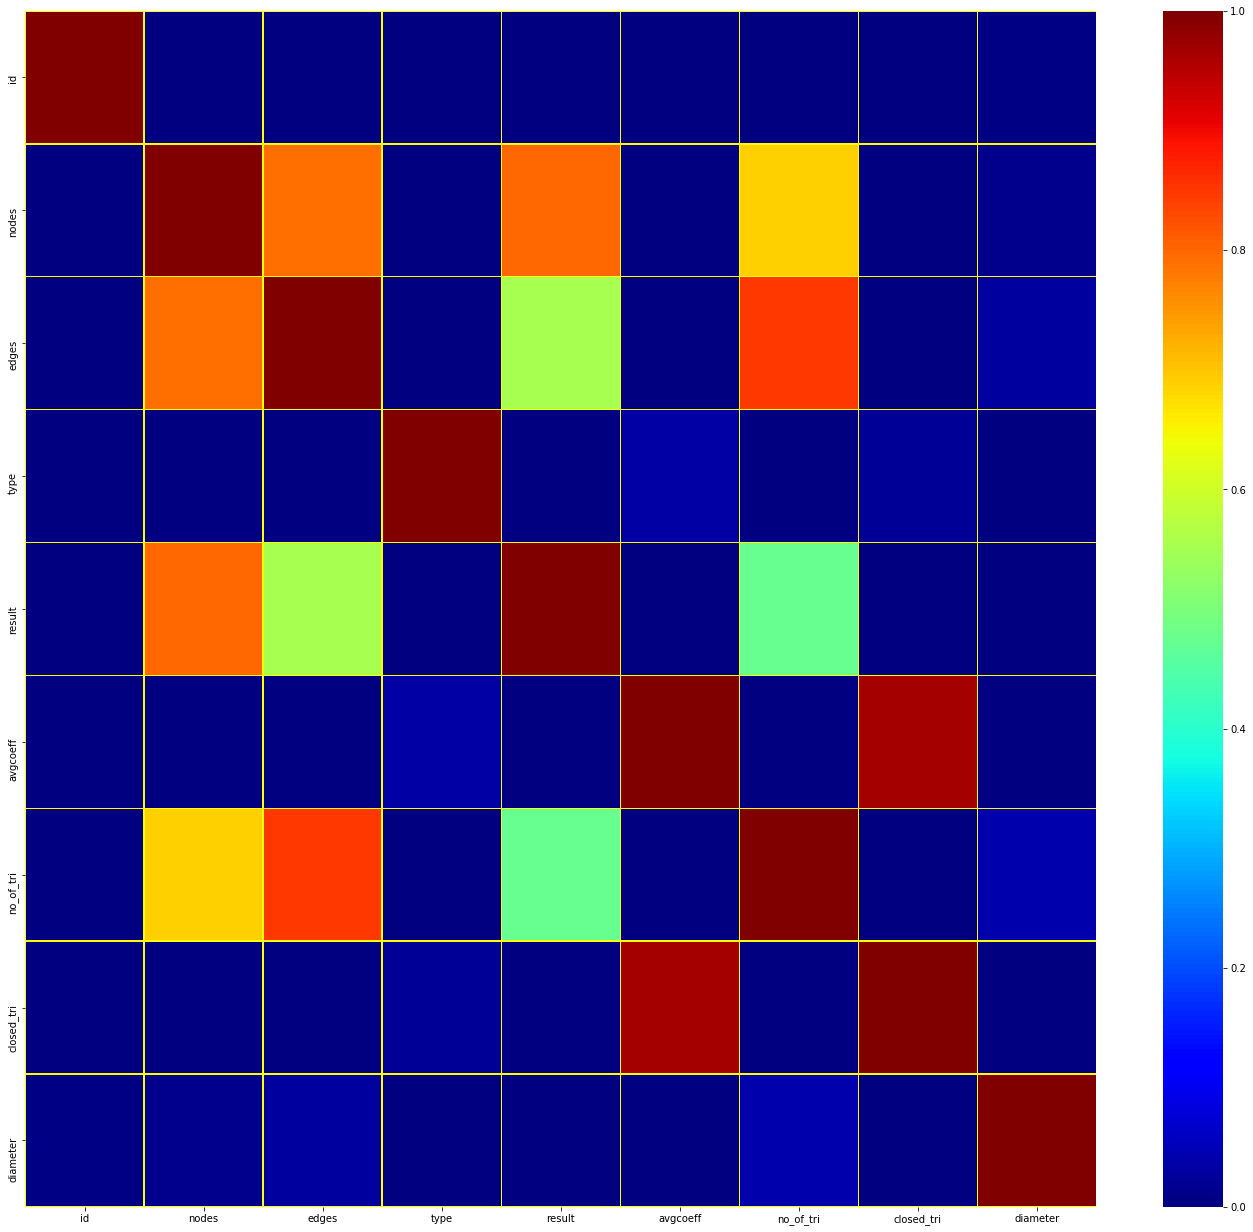

In [78]:
corr = train.corr()
#fig, ax = plt.subplots(figsize=(10,10))
plt.figure(figsize = (24,22))
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values,cmap="jet",vmin=0,vmax=1,linecolor="yellow",fmt="d",linewidths=.5)

In [79]:
corr
cmat = pd.DataFrame(corr)
cmat.to_csv('correlation_matrix.csv', index=False)

In [80]:
train.columns[train.isnull().any()]

Index([], dtype='object')

In [81]:
train.columns[train.isnull().any()].nunique()

0

In [82]:
miss=train.isnull().sum()/len(train)
miss=miss[miss>0]
miss.sort_values(inplace=True)
miss

Series([], dtype: float64)

In [83]:
train['result'].skew()

-0.06360056428503869

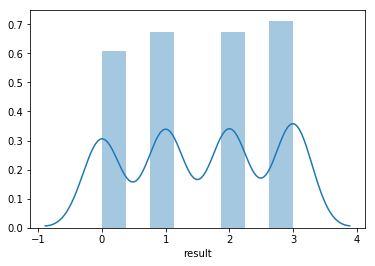

In [84]:
sns.distplot(train['result'])

In [85]:
target=np.log(train['result'])
target.skew()

nan

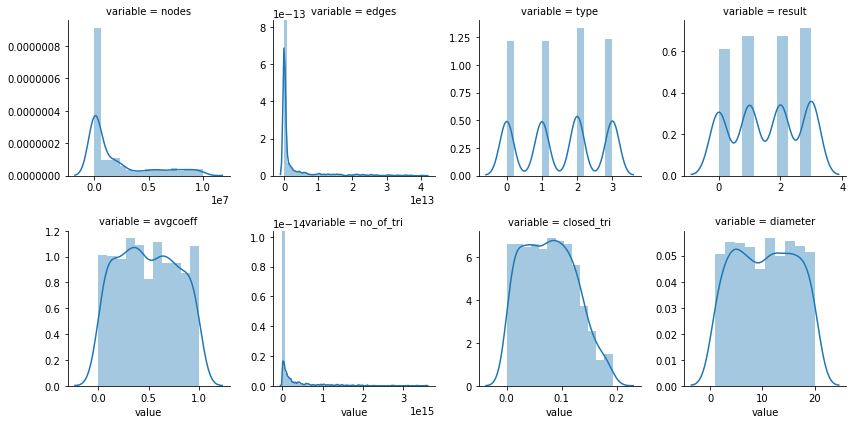

In [86]:
#create numeric plots
num = [f for f in train.columns if train.dtypes[f] != 'object']
num.remove('id')
nd = pd.melt(train, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

In [87]:
X=train[['id', 'nodes', 'edges', 'type', 'avgcoeff', 'no_of_tri',
       'closed_tri', 'diameter']]
y=train['result']

In [88]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.10)

In [89]:
from sklearn.ensemble import RandomForestClassifier
from keras.utils import to_categorical
y_b = to_categorical(ytrain)

Epoch 1/30
900/900 [==============================] - 2s 3ms/step - loss: 1.3879 - acc: 0.2489
Epoch 2/30
900/900 [==============================] - 0s 386us/step - loss: 1.3863 - acc: 0.2489
Epoch 3/30
900/900 [==============================] - 0s 409us/step - loss: 1.3864 - acc: 0.2356
Epoch 4/30
900/900 [==============================] - 0s 418us/step - loss: 1.3856 - acc: 0.2567
Epoch 5/30
900/900 [==============================] - 0s 423us/step - loss: 1.3859 - acc: 0.2589
Epoch 6/30
900/900 [==============================] - 0s 403us/step - loss: 1.3854 - acc: 0.2589
Epoch 7/30
900/900 [==============================] - 0s 401us/step - loss: 1.3856 - acc: 0.2589
Epoch 8/30
900/900 [==============================] - 0s 390us/step - loss: 1.3857 - acc: 0.2589
Epoch 9/30
900/900 [==============================] - 0s 384us/step - loss: 1.3857 - acc: 0.2533
Epoch 10/30
900/900 [==============================] - 0s 390us/step - loss: 1.3856 - acc: 0.2589
Epoch 11/30
900/900 [==========

Text(0.5,0,'epoch')

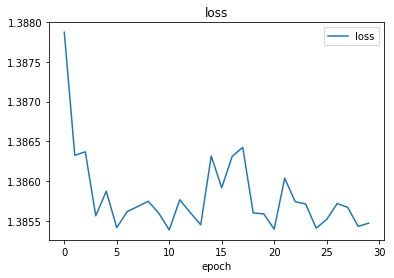

In [90]:
model = Sequential()
model.add(Dense(5000, input_shape=(8,), activation='softmax'))
model.add(Dense(20, activation='softmax'))
model.add(Dense(4, activation='softmax'))
model.compile(Adam(lr = 0.01), 'categorical_crossentropy', metrics=['accuracy'])
h=model.fit(x=xtrain,y=y_b,batch_size=100,epochs=30,shuffle='true')


plt.plot(h.history['loss'])
plt.legend(['loss'])
plt.title('loss')
plt.xlabel('epoch')


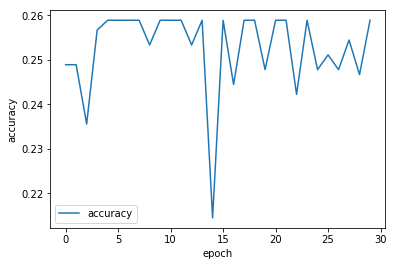

In [91]:
plt.plot(h.history['acc'])
plt.legend(['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
predict = model.predict_classes(xtest)

In [92]:
accracy

0.95642